In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




In [ ]:

# Load the dataset
data = pd.read_csv('/content/fy2023-property-assessment-data.csv')

# Basic information
print("Dataset Shape:", data.shape)
print("\nData Types:\n", data.dtypes)
print("\nFirst Few Rows:\n", data.head())

Dataset Shape: (180627, 60)

Data Types:
 PID                     int64
CM_ID                 float64
GIS_ID                  int64
ST_NUM                float64
ST_NAME                object
UNIT_NUM               object
CITY                   object
ZIP_CODE              float64
BLDG_SEQ              float64
NUM_BLDGS               int64
LUC                     int64
LU                     object
LU_DESC                object
BLDG_TYPE              object
OWN_OCC                object
OWNER                  object
OWNER MAIL ADDRESS     object
RES_FLOOR             float64
CD_FLOOR              float64
RES_UNITS             float64
COM_UNITS             float64
RC_UNITS              float64
LAND_SF               float64
GROSS_AREA            float64
LIVING_AREA           float64
LAND_VALUE              int64
BLDG_VALUE              int64
TOTAL_VALUE             int64
GROSS_TAX             float64
YR_BUILT              float64
YR_REMODEL            float64
STRUCTURE_CLASS        objec

In [ ]:
data.select_dtypes(include=['float64', 'int64']).columns
num_cols=['NUM_BLDGS',
       'LUC', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS',
       'LAND_SF', 'GROSS_AREA', 'LIVING_AREA', 'LAND_VALUE', 'BLDG_VALUE',
       'TOTAL_VALUE', 'GROSS_TAX', 'YR_BUILT', 'YR_REMODEL', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'FIREPLACES',
       'NUM_PARKING']

In [ ]:
data.select_dtypes(include=['object']).columns
cat_list=['CITY', 'LU', 'BLDG_TYPE', 'OWN_OCC',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE',
       'ROOF_COVER', 'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND',
       'OVERALL_COND', 'BDRM_COND', 'BTHRM_STYLE1', 'BTHRM_STYLE2',
       'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2',
       'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE', 'ORIENTATION',
       'PROP_VIEW', 'CORNER_UNIT']

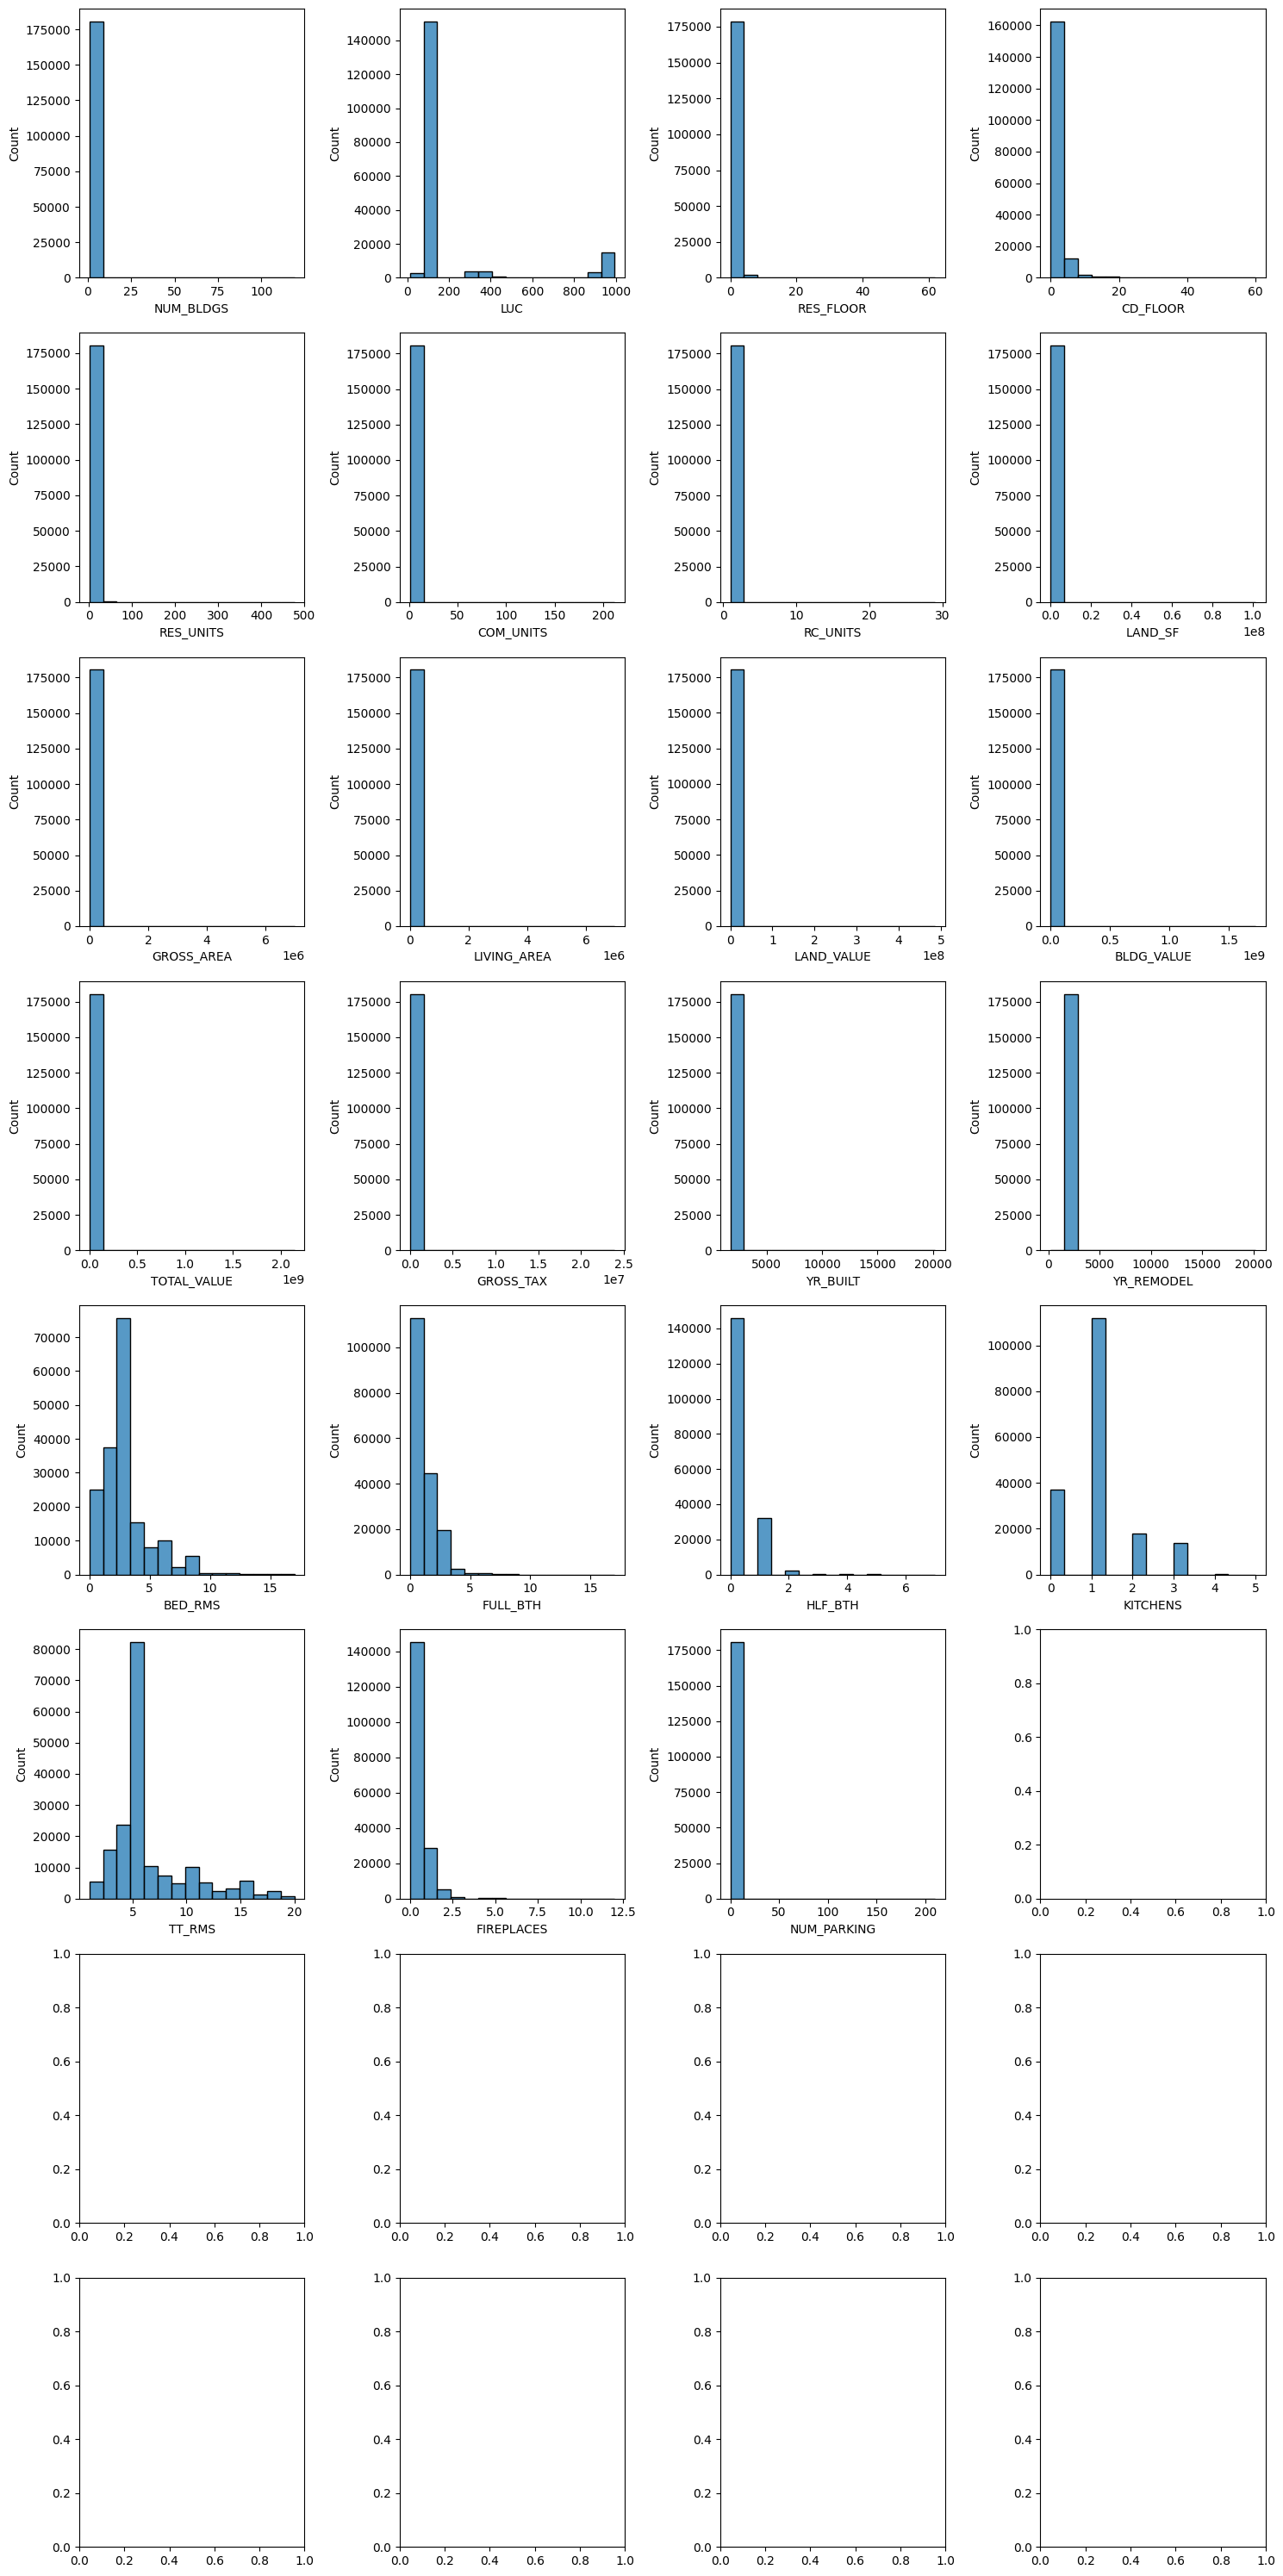

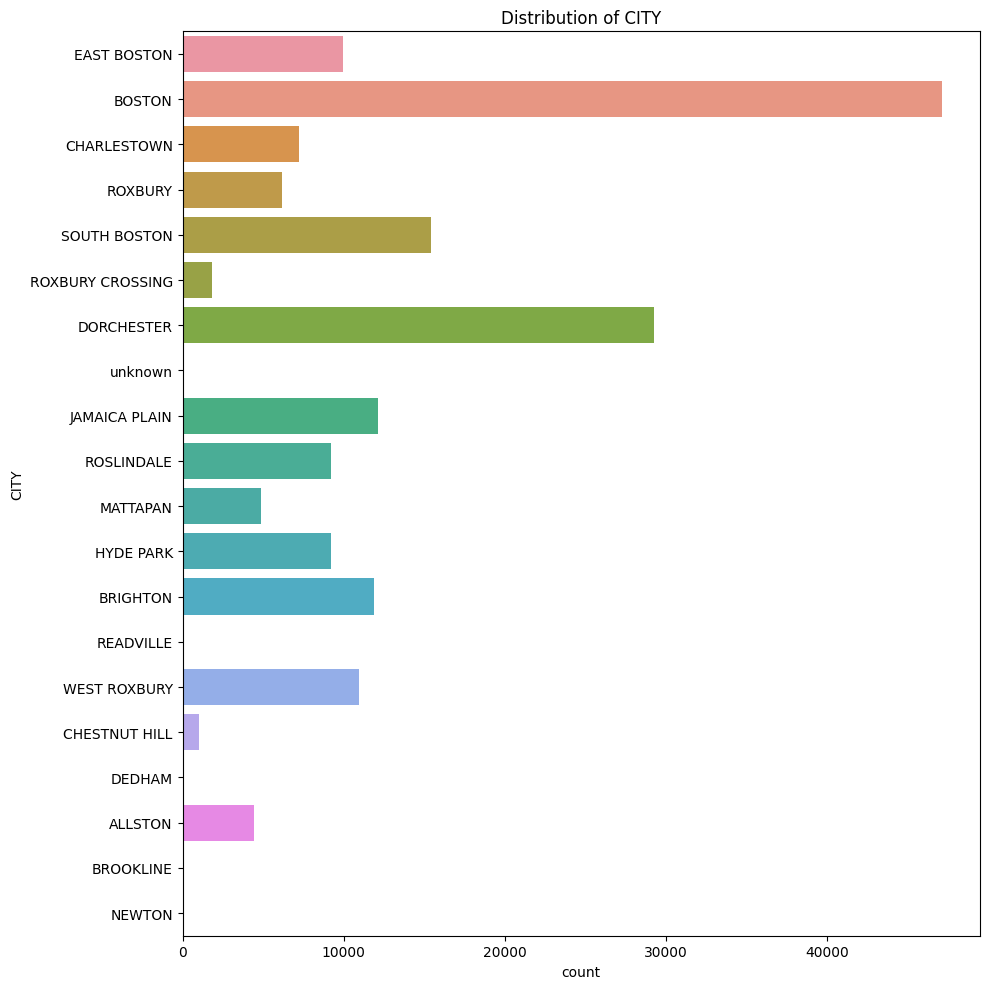

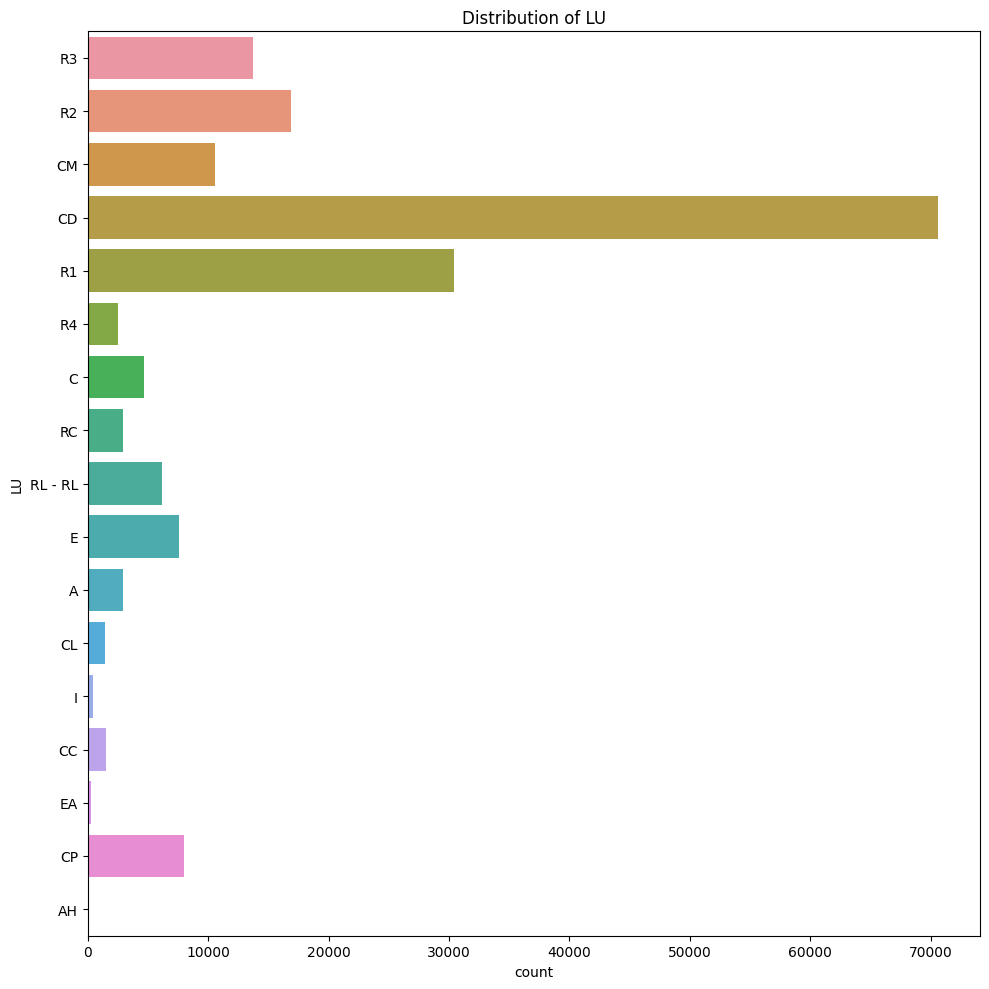

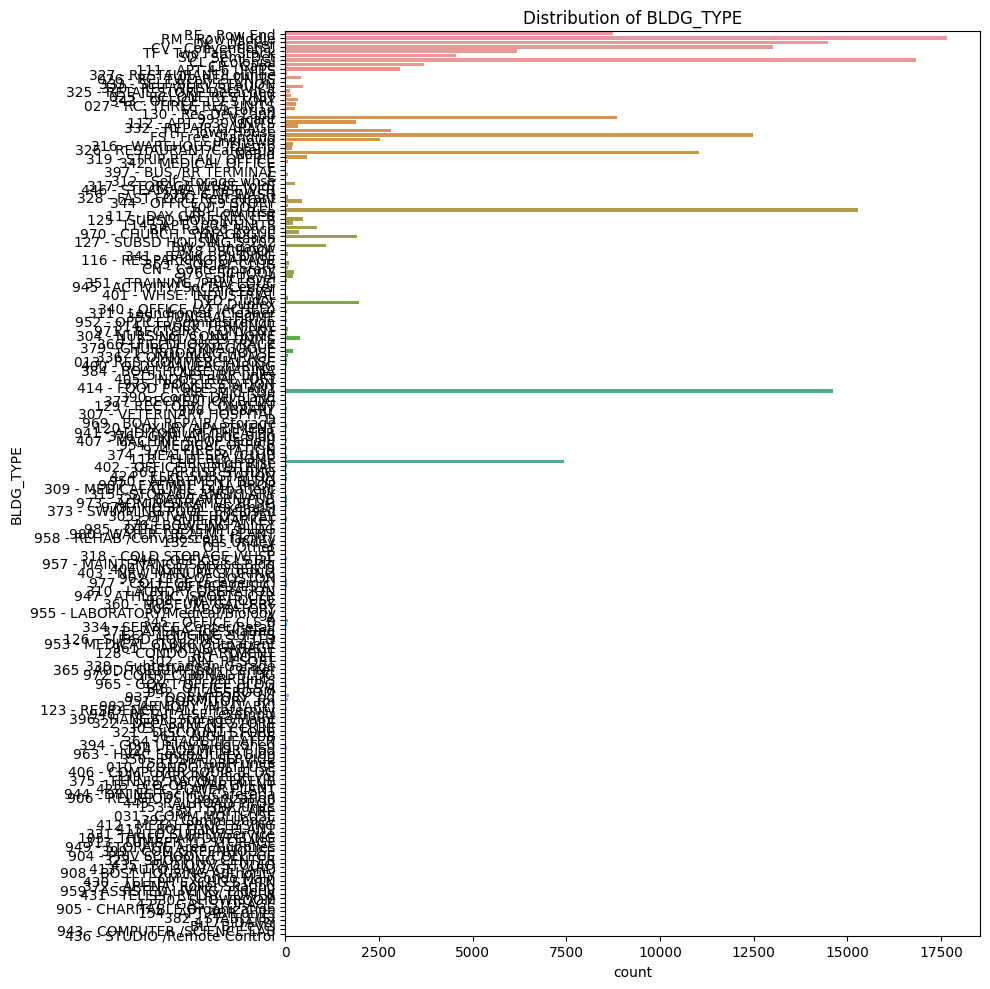

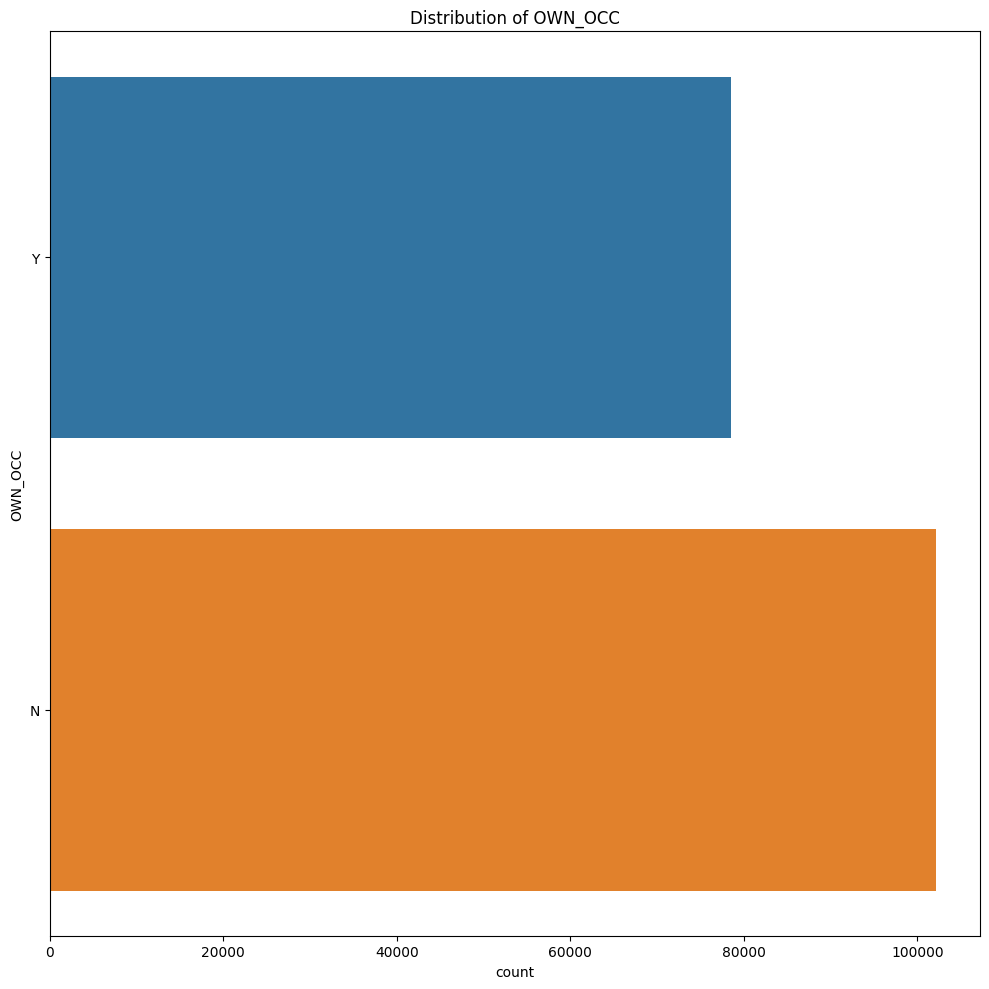

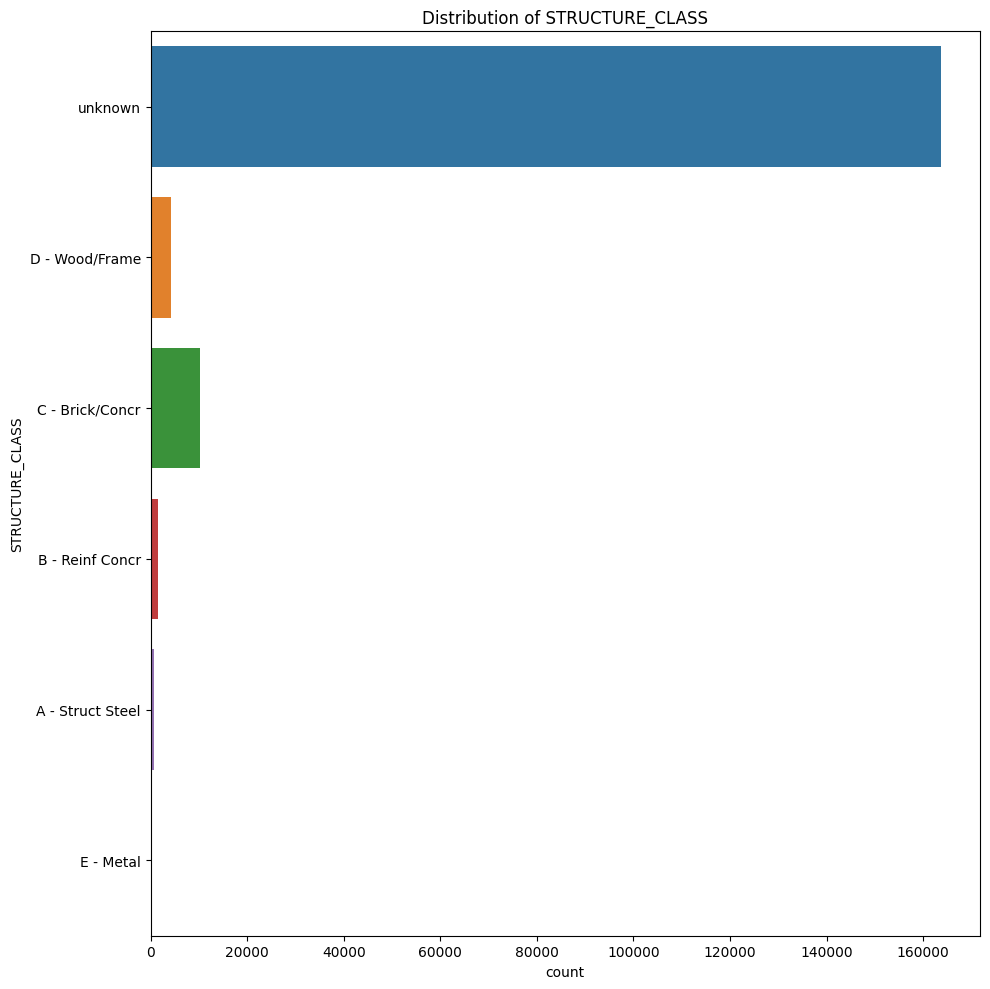

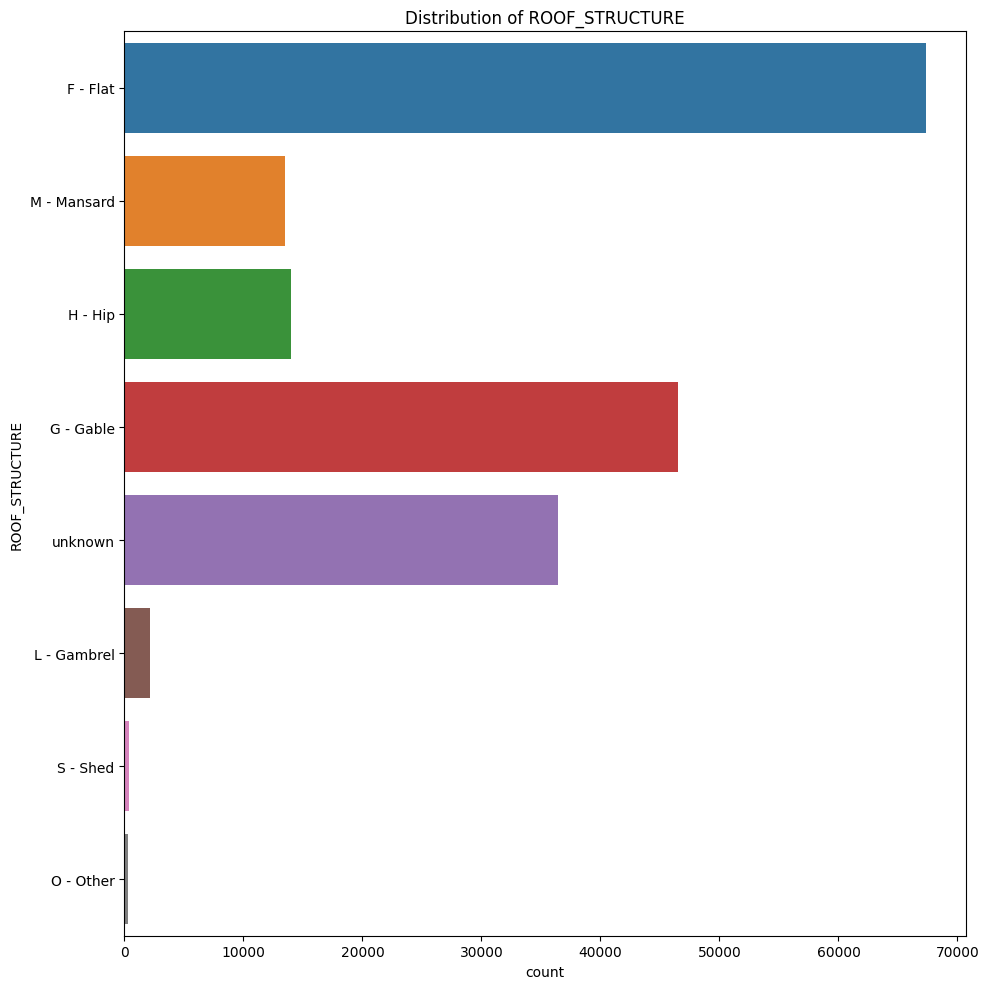

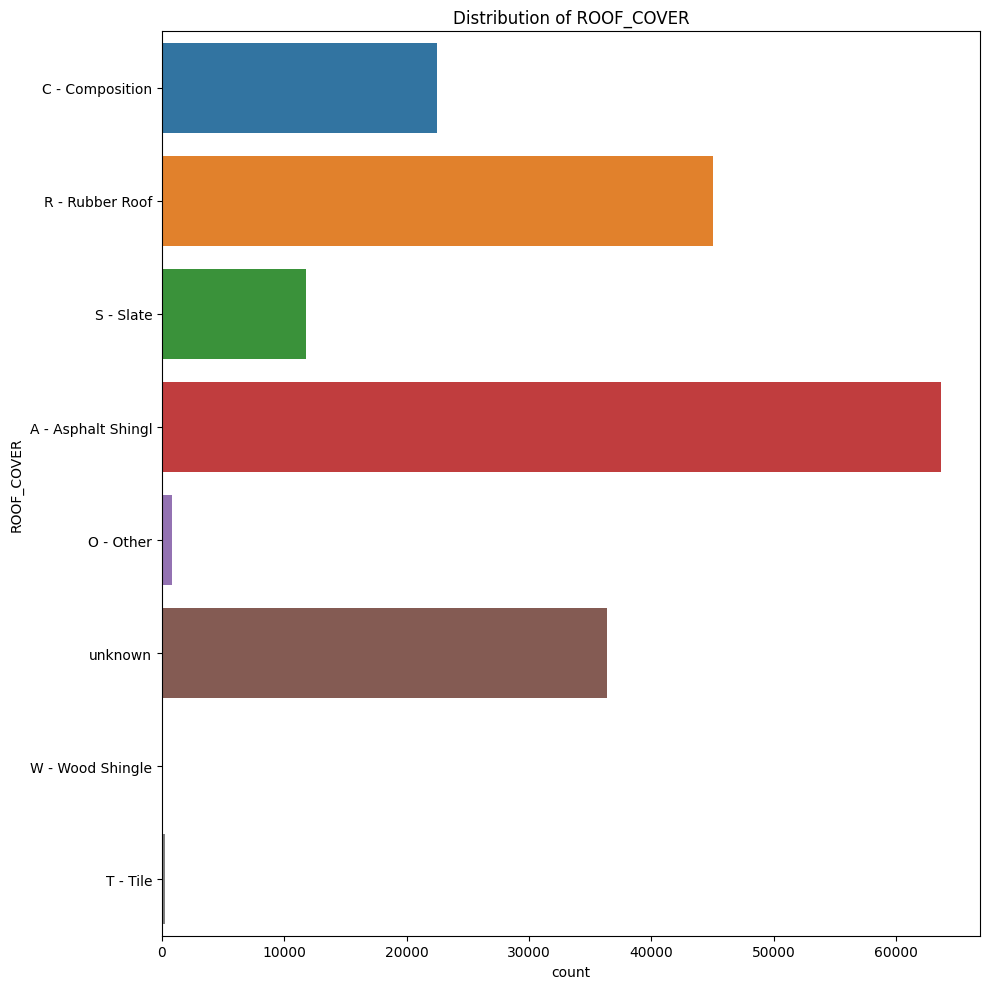

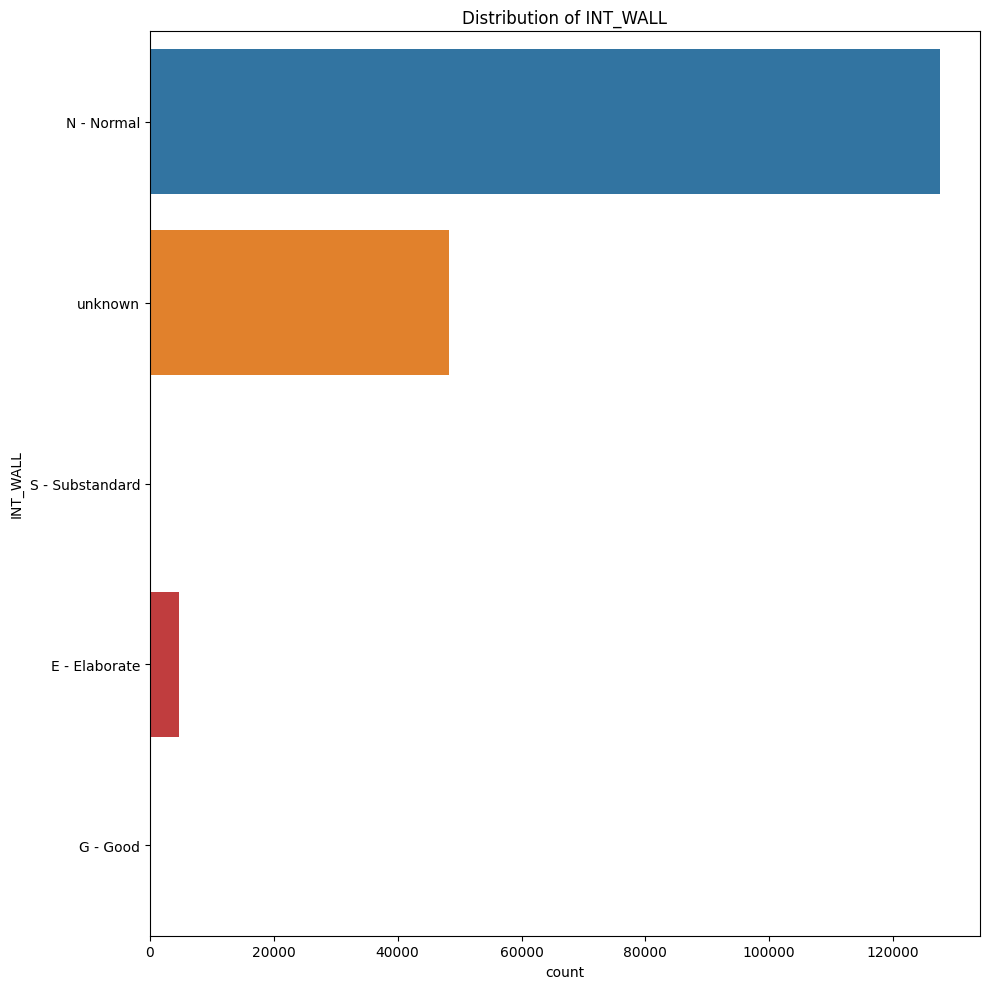

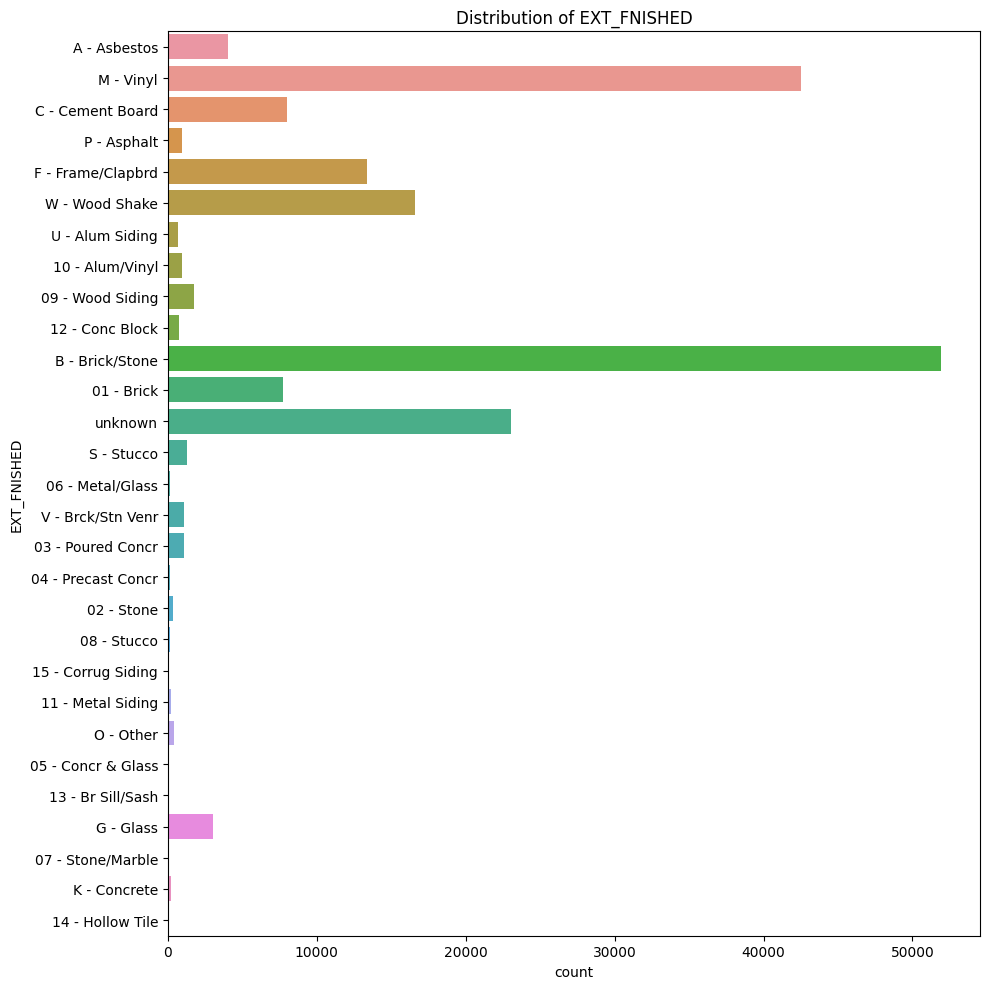

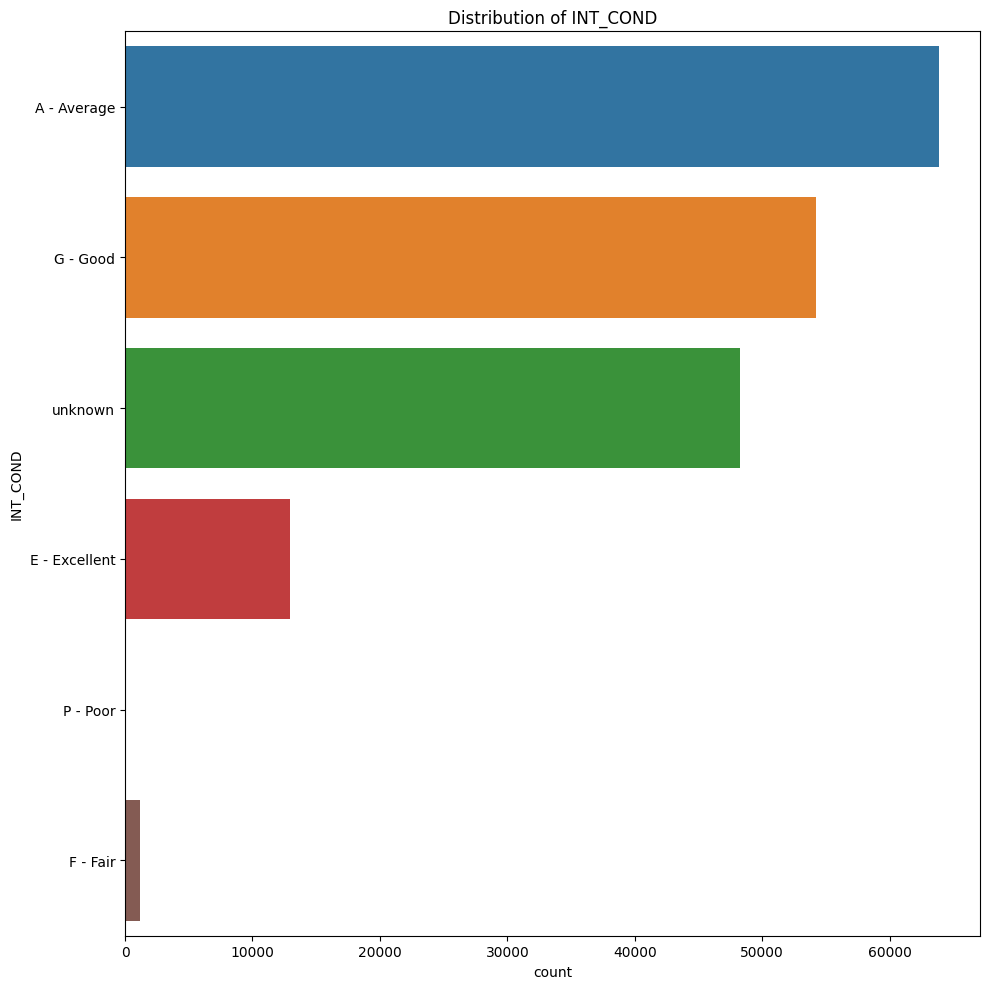

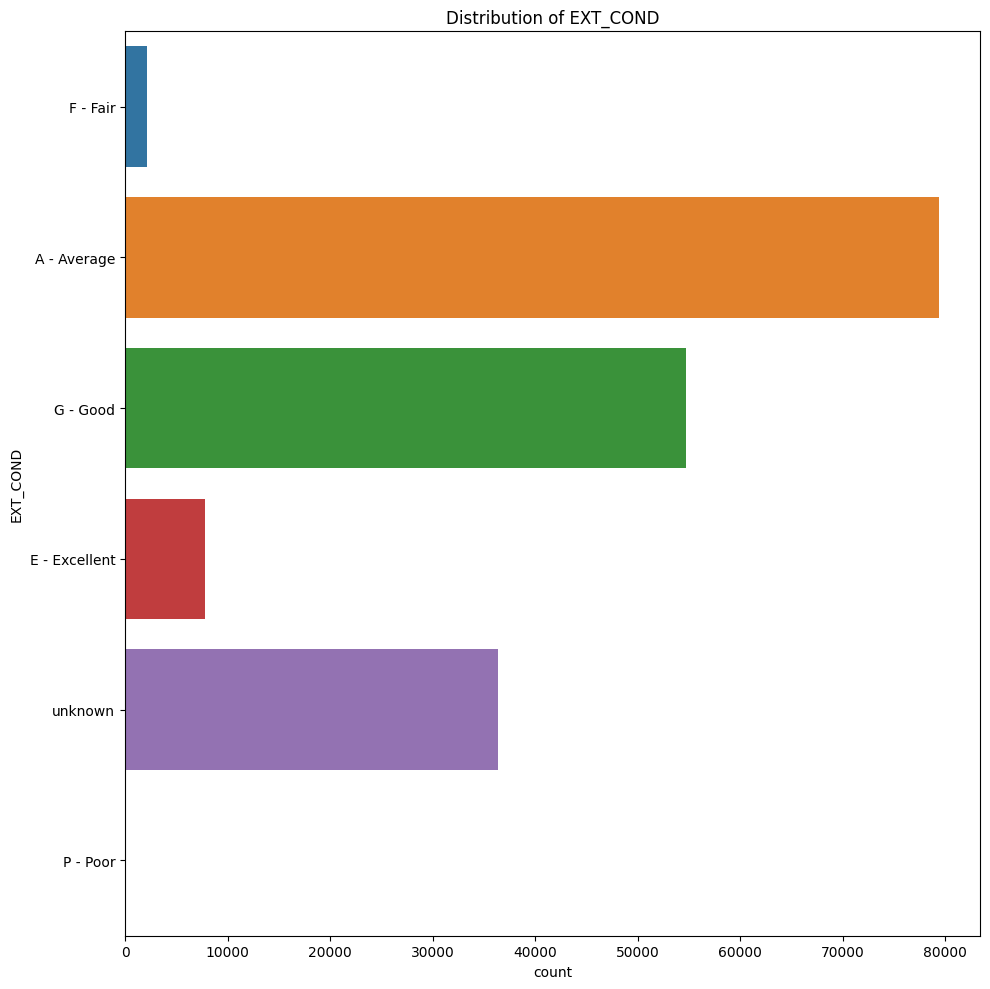

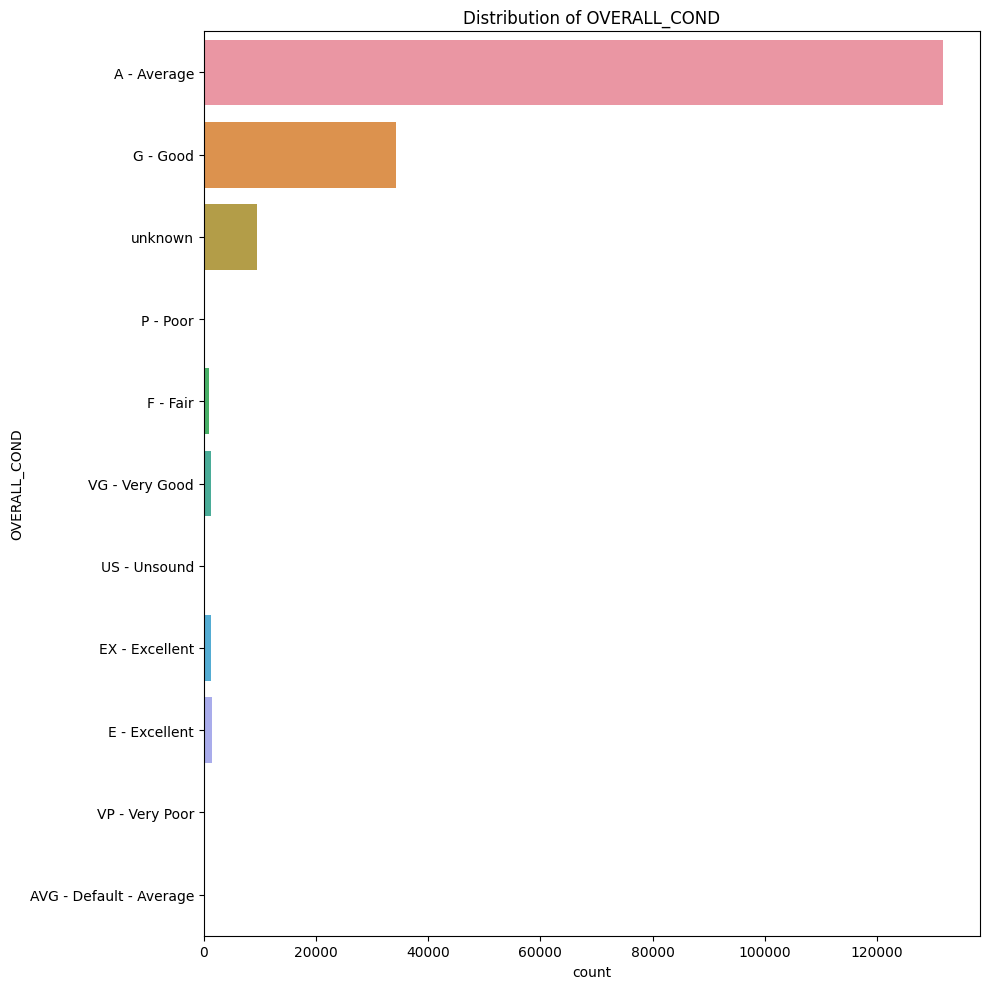

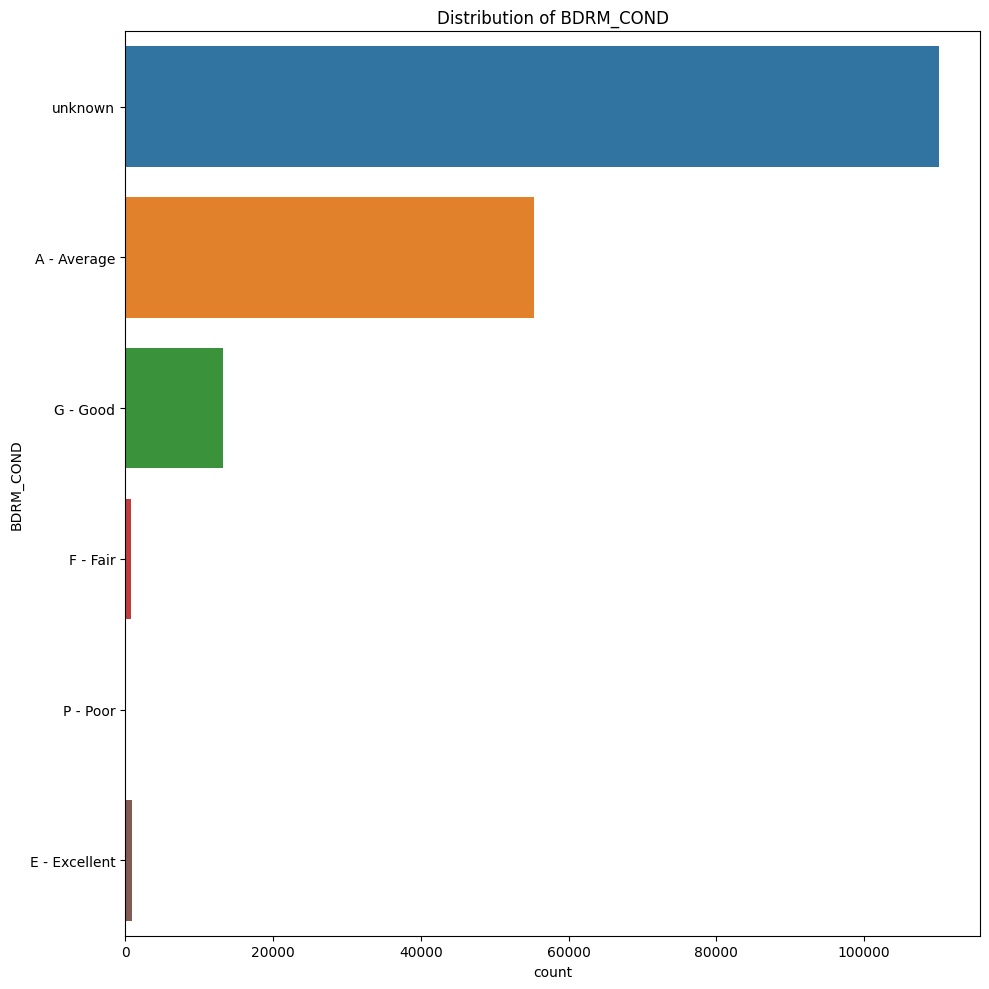

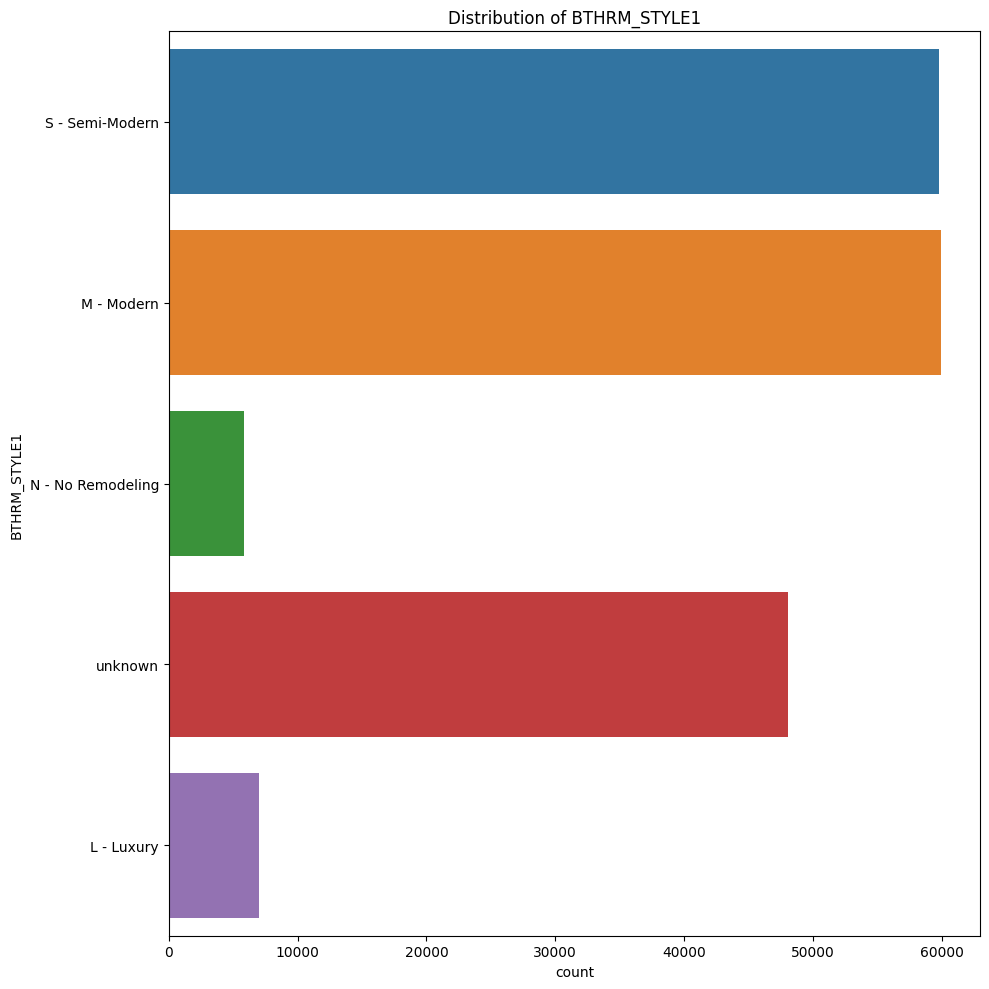

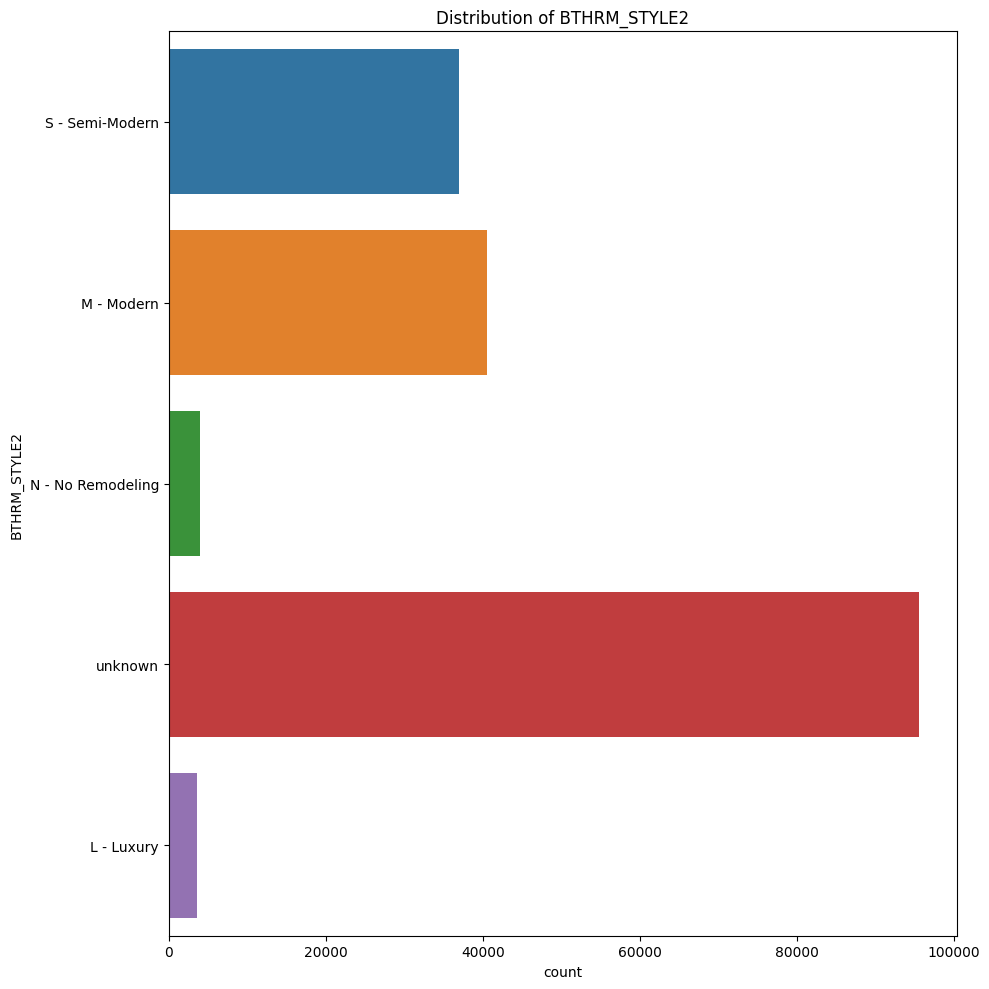

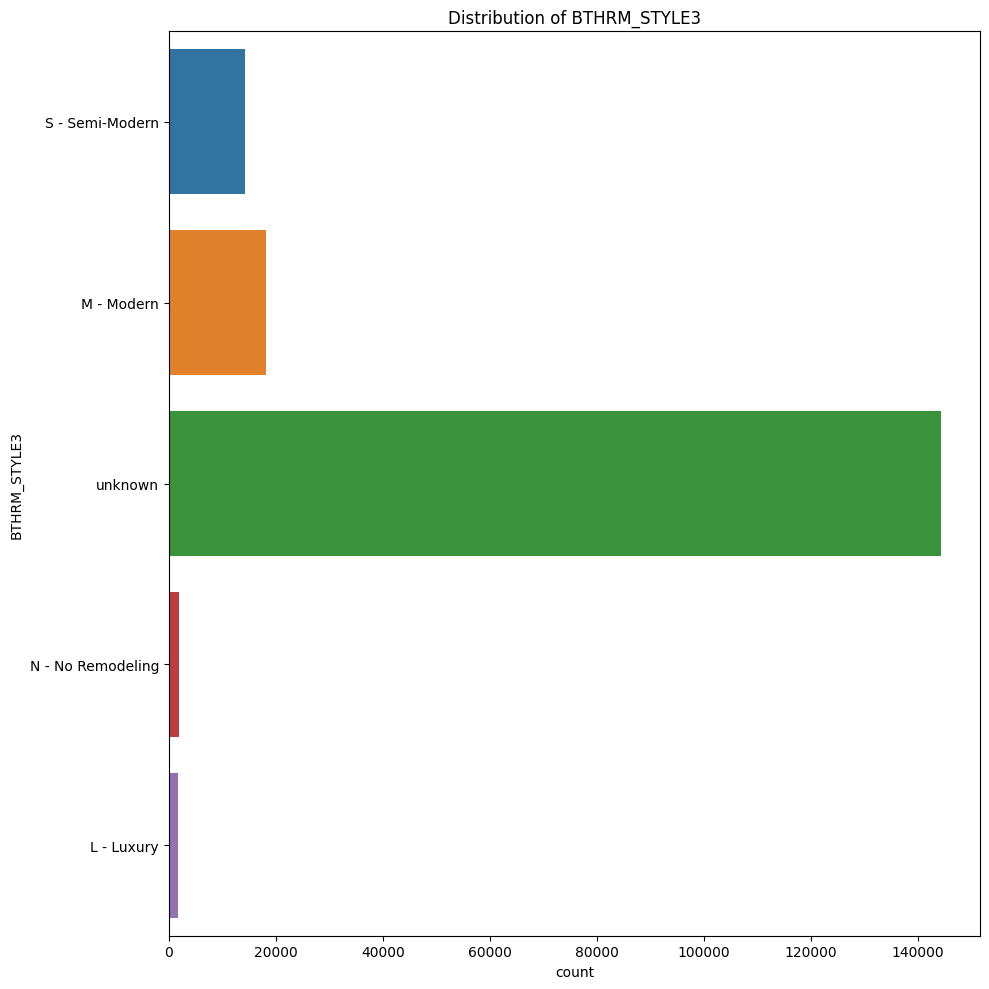

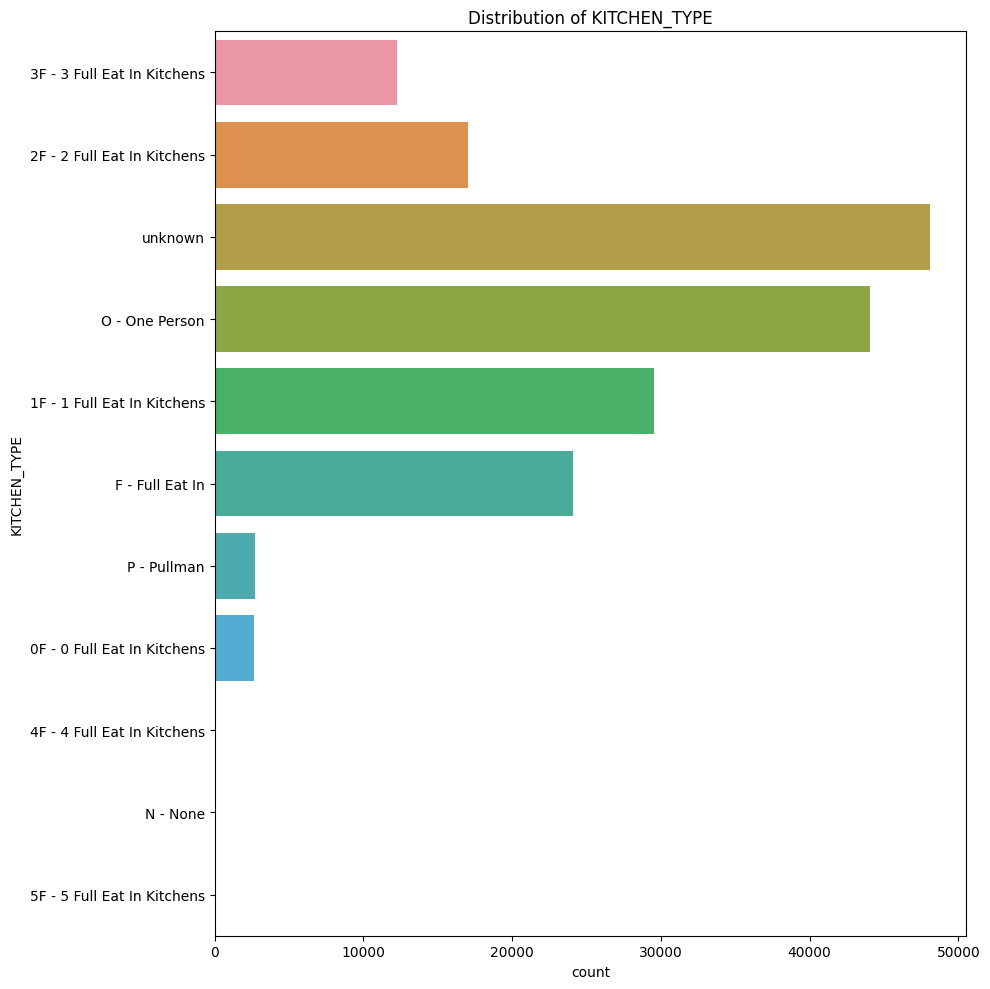

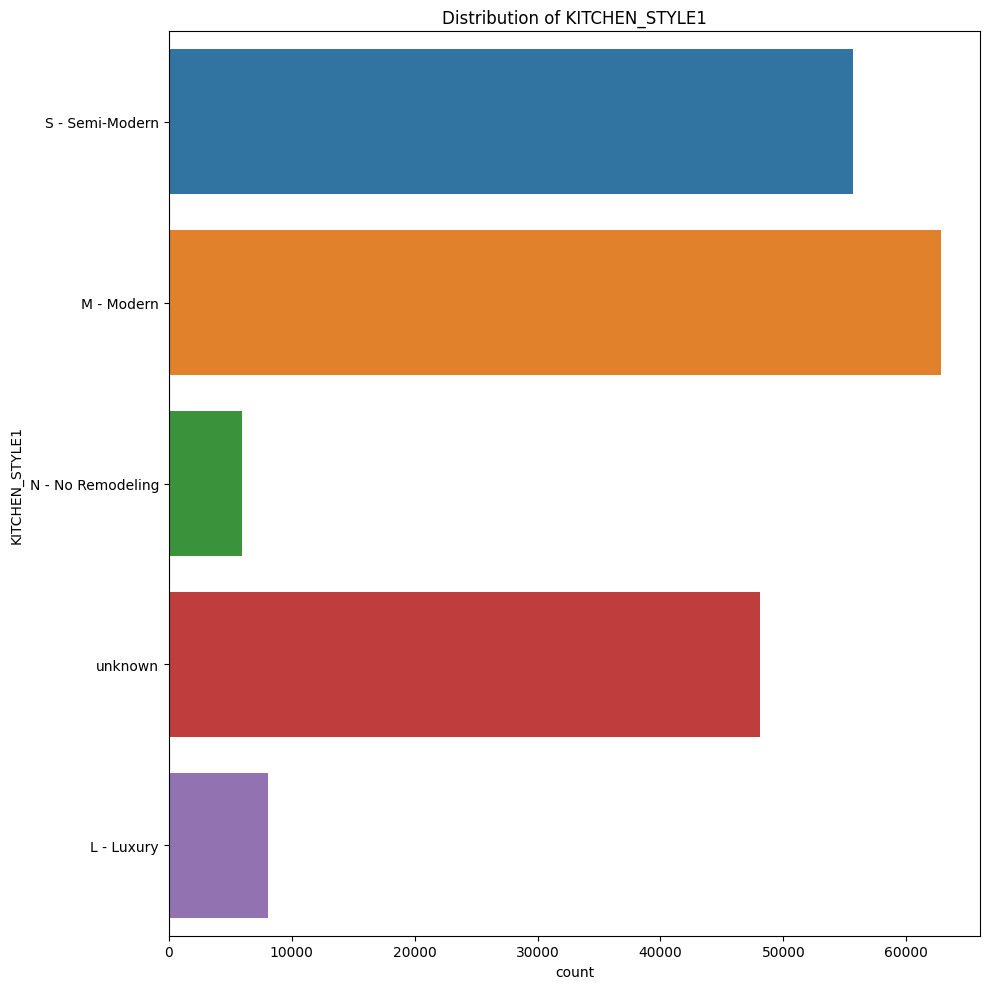

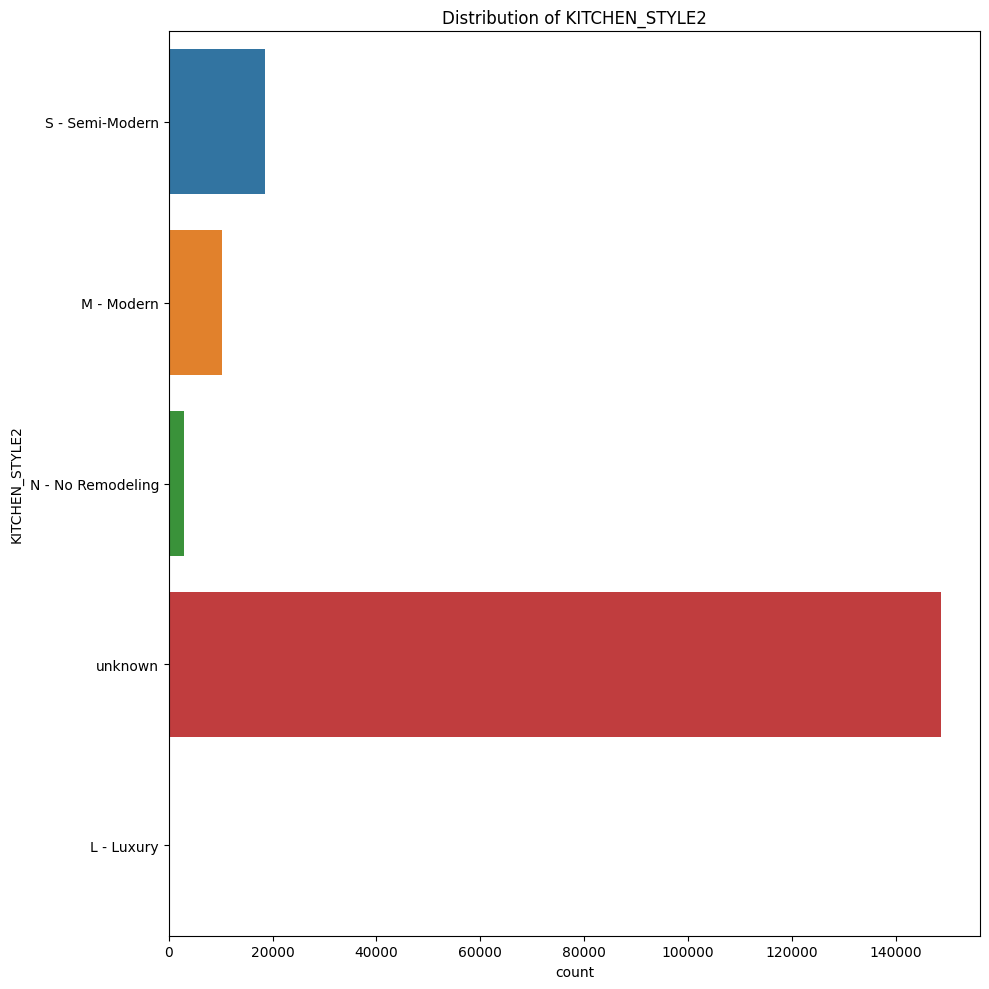

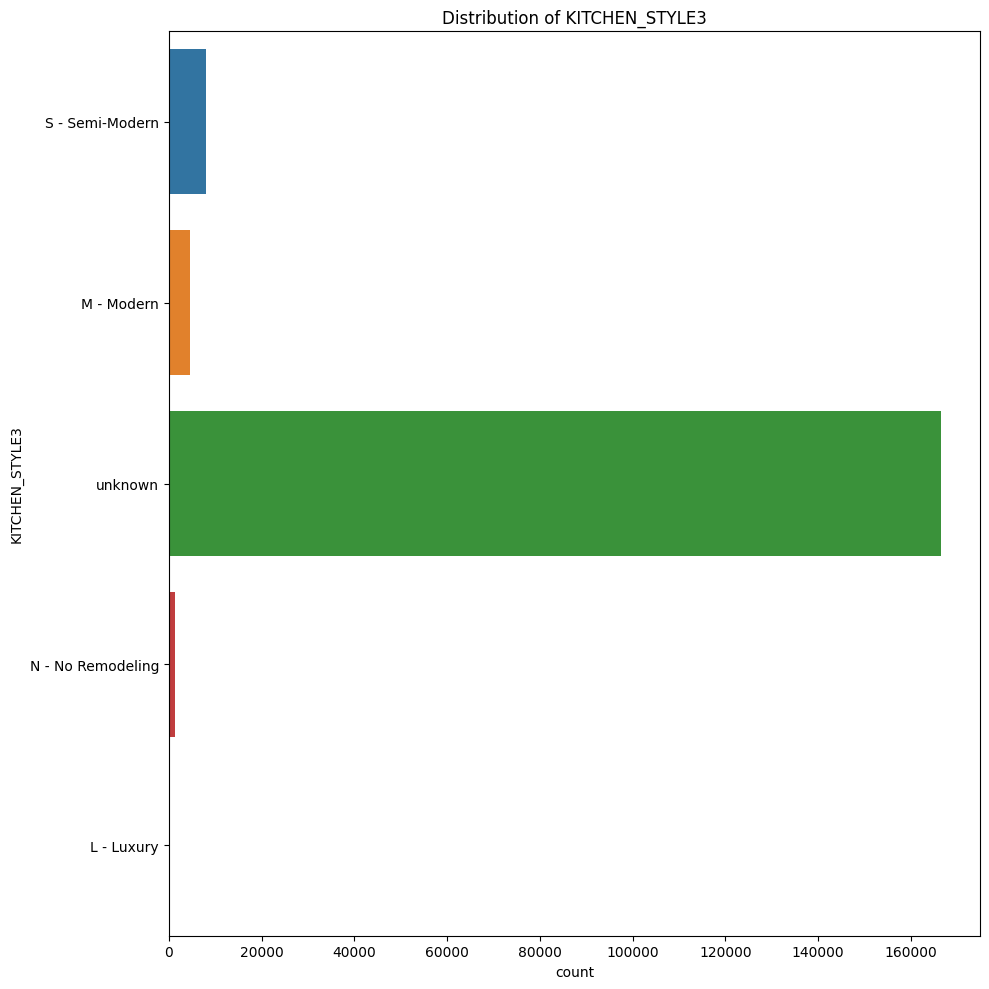

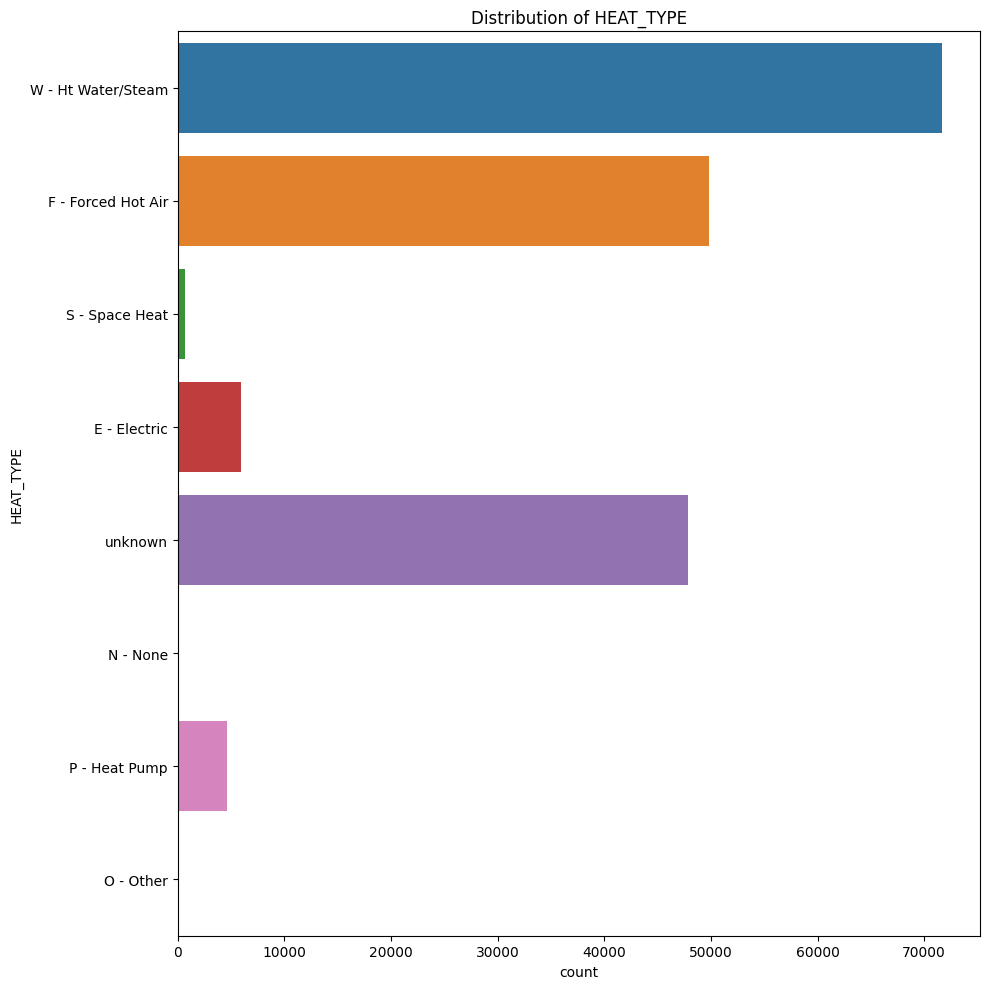

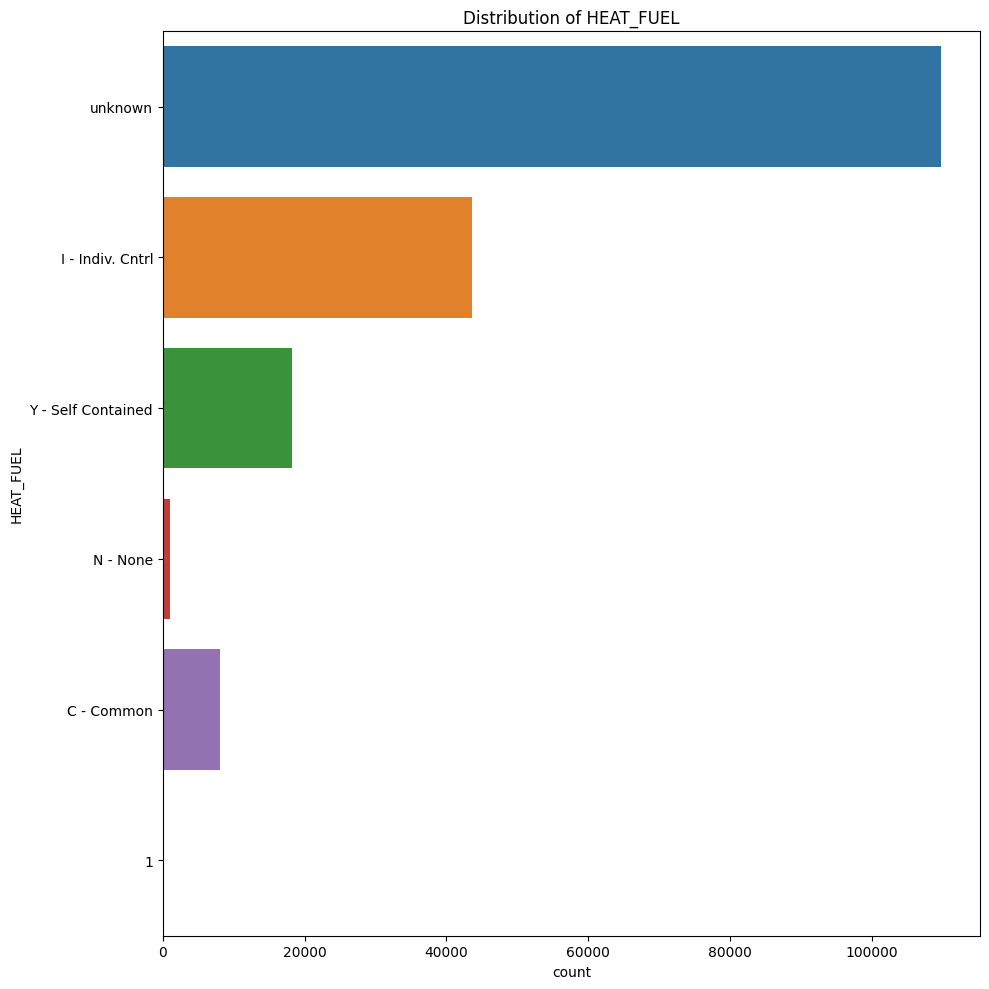

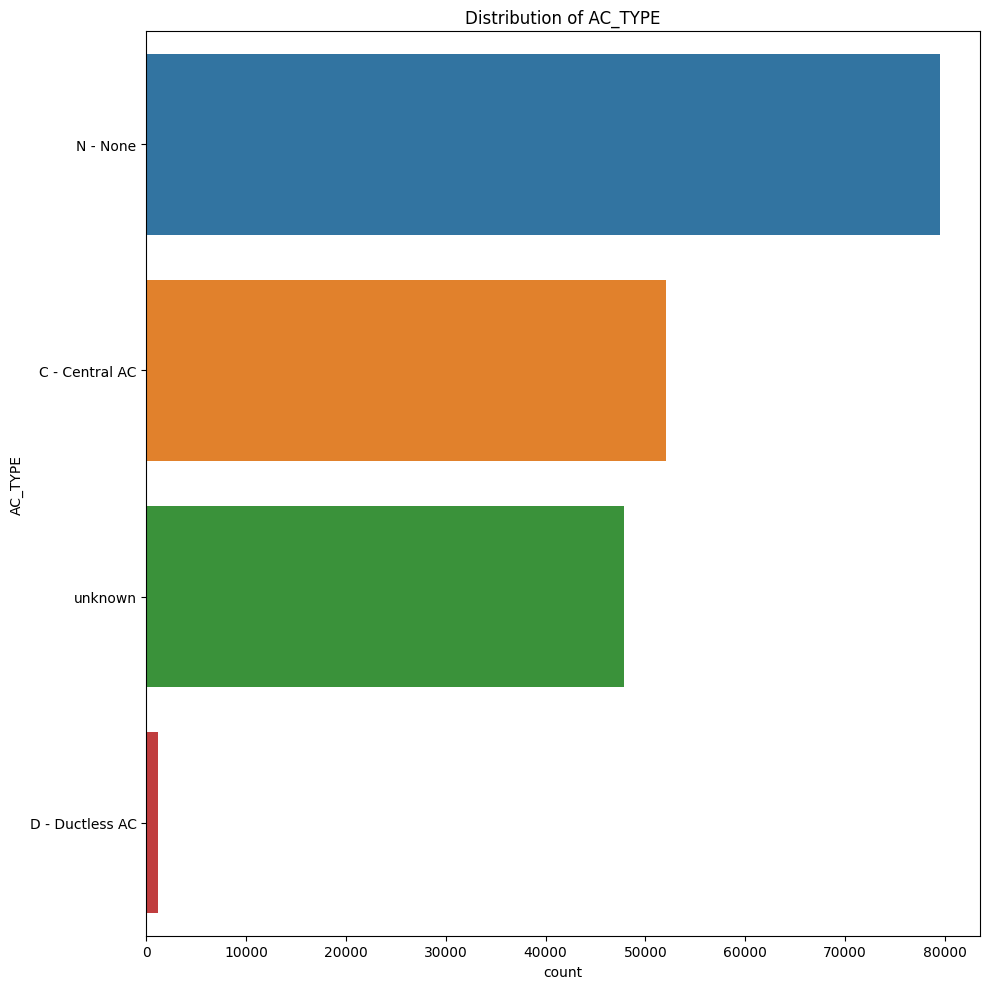

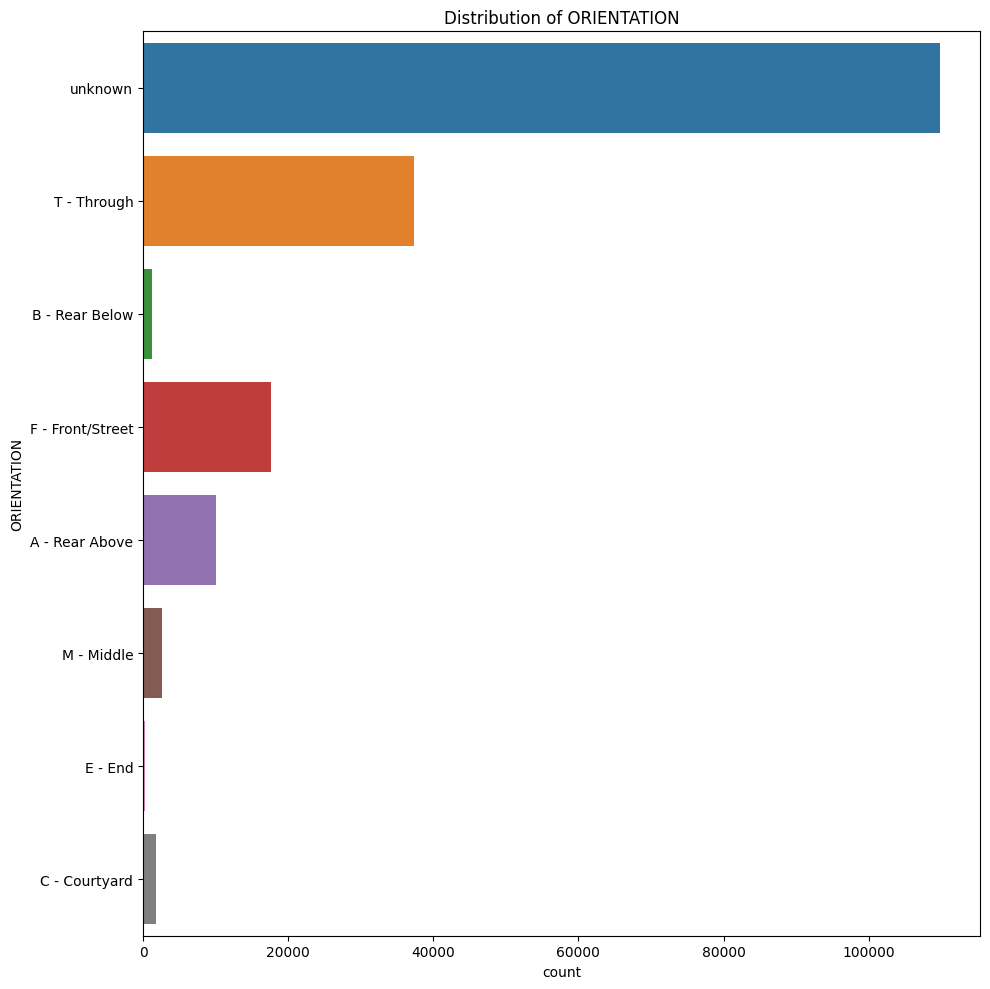

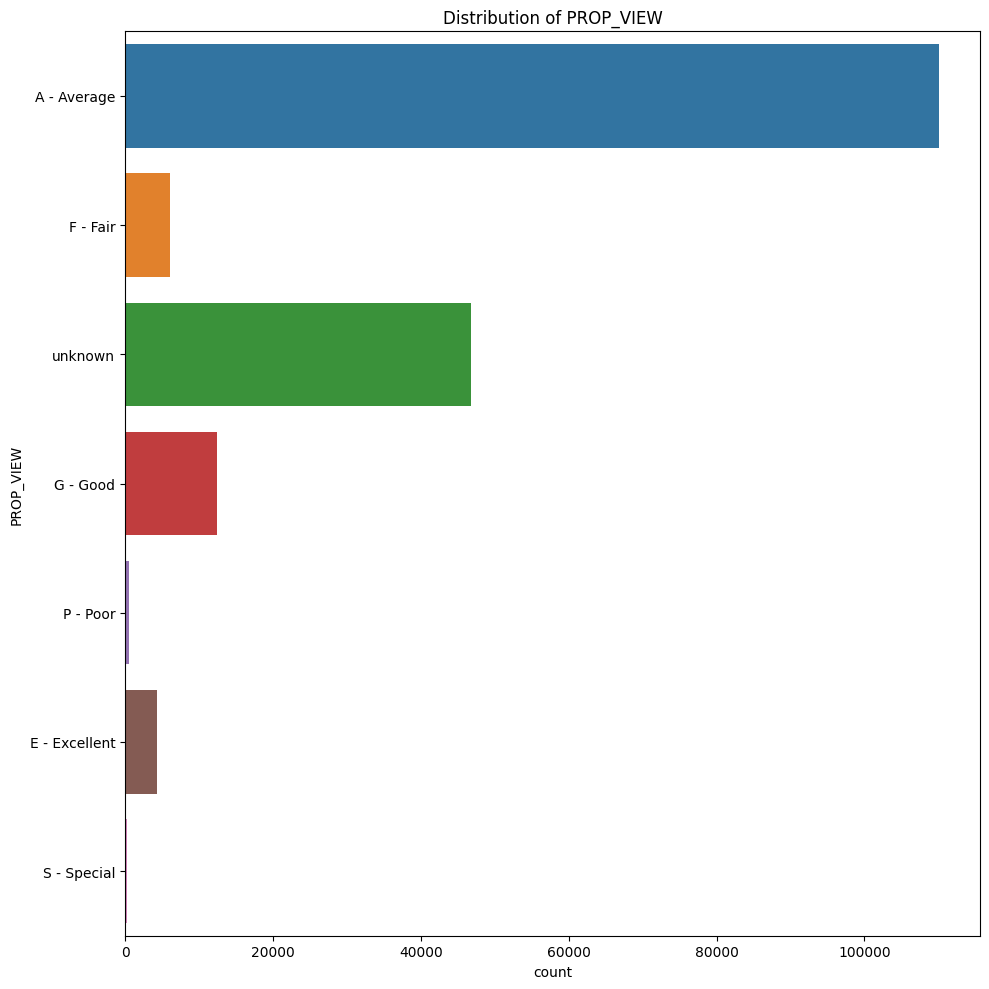

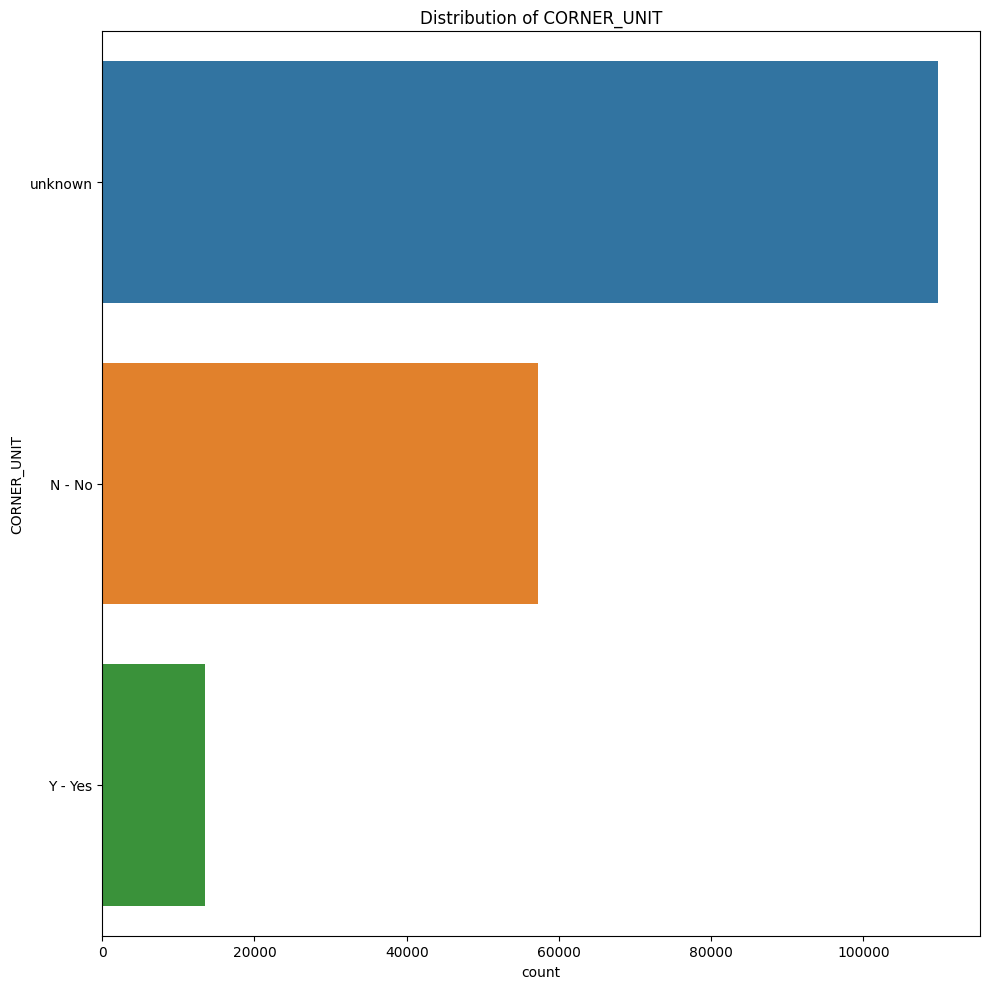

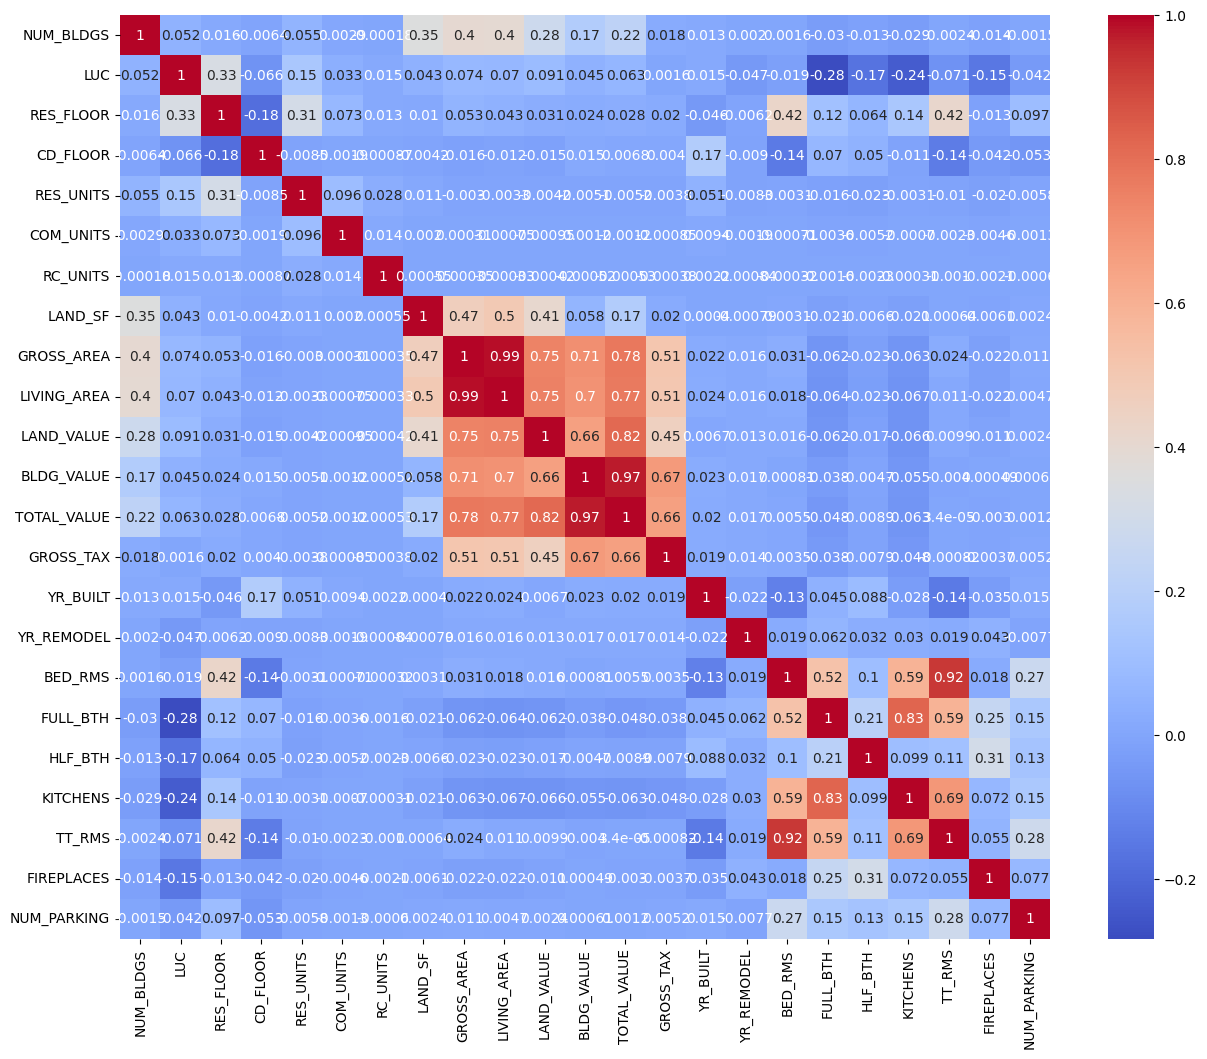

In [ ]:
plot_rows = 8  # Adjust as needed
plot_cols = 4  # Adjust as needed
plot_width = 15
plot_height = plot_width / plot_cols * plot_rows

# Histograms for numerical columns using Seaborn
fig, axes = plt.subplots(plot_rows, plot_cols, figsize=(plot_width, plot_height))
axes = axes.flatten()  # Flatten the array for easy indexing
for i, col in enumerate(num_cols):
    sns.histplot(data[col], ax=axes[i], bins=15)
plt.tight_layout()
plt.show()


# Bar plots for categorical columns using Seaborn
for col in cat_list:
    plt.figure(figsize=(10, 10))  # Adjust size as needed
    sns.countplot(y=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()

# Correlation matrix with a larger plot
plt.figure(figsize=(15, 12))  # Adjust size as needed
correlation_matrix = data[num_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

 1.Based on the histograms provided, here are some observations regarding the distribution of various variables in your dataset:

NUM_BLDGS: The distribution is highly skewed to the right, with the majority of properties having a low number of buildings, and very few properties having a high number of buildings.

LUC (Land Use Code?): Appears to have a categorical distribution with certain codes being much more common than others.

RES_FLOOR & CD_FLOOR (Residential Floors & Commercial Floors?): Both have a majority of the count at the lower end, indicating that most properties have a small number of floors.

RES_UNITS & COM_UNITS (Residential & Commercial Units?): These histograms show a right-skewed distribution, similar to NUM_BLDGS, indicating that most properties have few units, while a small number of properties have many.

RC_UNITS: This variable might represent some type of unit count, and it's heavily skewed, with almost all properties having a value of zero or close to zero.

LAND_SF (Land Square Footage?): The distribution is right-skewed, suggesting that most properties have a smaller land area, with a few properties having a very large area.

GROSS_AREA & LIVING_AREA: Both are right-skewed, indicating that most properties have smaller areas with a few properties having much larger areas.

LAND_VALUE, BLDG_VALUE, TOTAL_VALUE: All three variables show a highly right-skewed distribution, indicating that most properties are on the lower end of value, with a few very high-value properties.

GROSS_TAX: This is also right-skewed, showing that most properties pay a lower amount of tax, with a few properties paying significantly more.

YR_BUILT & YR_REMODEL: These variables show a multimodal distribution, indicating that there are peaks at certain years which could correspond to periods of development or renovation booms.
BED_RMS, FULL_BTH, HLF_BTH (Bedrooms, Full Baths, Half Baths): All are slightly right-skewed but show a more uniform distribution for lower counts, indicating a common range within which most property counts fall.
KITCHENS: Most properties seem to have one kitchen, with very few having more than one.
TT_RMS (Total Rooms?): Appears right-skewed, indicating that most properties have a lower total room count, with fewer properties having a very high count.
FIREPLACES: This variable is heavily right-skewed, with most properties having no fireplace and a few having one or more.
NUM_PARKING (Number of Parking Spaces): Also right-skewed, with the majority of properties having a low number of parking spaces.


2.Here's an analysis based on the correlation matrix:

High Correlation between Area and Value Metrics: There's a strong positive correlation between GROSS_AREA, LIVING_AREA, LAND_VALUE, BLDG_VALUE, and TOTAL_VALUE. This suggests that as the size of a property increases, its assessed land and building value, as well as the total value, tend to increase. This is expected as larger properties usually have higher values.

Number of Units and Value: There are notable positive correlations between the number of residential units (RES_UNITS) and commercial units (COM_UNITS) with TOTAL_VALUE, LAND_VALUE, and BLDG_VALUE, which indicates that properties with more units are likely to be valued higher.


Negligible Correlation with Year Built and Remodel: YR_BUILT and YR_REMODEL show very low correlations with other variables, suggesting that the year a building was constructed or remodeled has little linear association with its size or assessed value in this dataset.

Tax and Value Correlation: GROSS_TAX is strongly correlated with TOTAL_VALUE, LAND_VALUE, and BLDG_VALUE, which is expected since tax is often calculated based on the assessed value of the property.


Number of Parking Spaces: NUM_PARKING has a moderate correlation with LIVING_AREA and GROSS_AREA, indicating that properties with larger living and total areas tend to have more parking spaces.

Fireplaces: FIREPLACES has a very low to negligible correlation with most variables, suggesting that the number of fireplaces in a property doesn't have a strong linear relationship with its size, value, or the number of rooms.

It's important to note that correlation does not imply causation. High or low correlation coefficients indicate the strength and direction of a linear relationship but do not confirm that one variable causes the other to change.


In [ ]:

# Calculate the mode for the 'YR_BUILT' and 'YR_REMODEL' columns
yr_built_mode = data['YR_BUILT'].mode()[0]
yr_remodel_mode = data['YR_REMODEL'].mode()[0]

# Fill missing values with the mode
data['YR_BUILT'] = data['YR_BUILT'].fillna(yr_built_mode).astype('int64')
data['YR_REMODEL'] = data['YR_REMODEL'].fillna(yr_remodel_mode).astype('int64')


Descriptive Statistics for YR_BUILT:
count    180627.000000
mean       1928.218450
std          60.483627
min        1700.000000
25%        1900.000000
50%        1910.000000
75%        1955.000000
max       20198.000000
Name: YR_BUILT, dtype: float64

Descriptive Statistics for YR_REMODEL:
count    180627.000000
mean       1992.714090
std          45.497325
min         201.000000
25%        1985.000000
50%        1985.000000
75%        2003.000000
max       20220.000000
Name: YR_REMODEL, dtype: float64

Skewness and Kurtosis for YR_BUILT:
Skewness: 152.88091409315854
Kurtosis: 46088.66485447269

Skewness and Kurtosis for YR_REMODEL:
Skewness: 355.0476214701576
Kurtosis: 142656.79067848905

Construction Counts by Decade:
1700         1
1710         1
1720         2
1750         2
1760         1
1770         2
1780         4
1790         9
1800        75
1810        30
1820       104
1830       199
1840       165
1850      1209
1860      1658
1870      2690
1880      5741
1890     20580

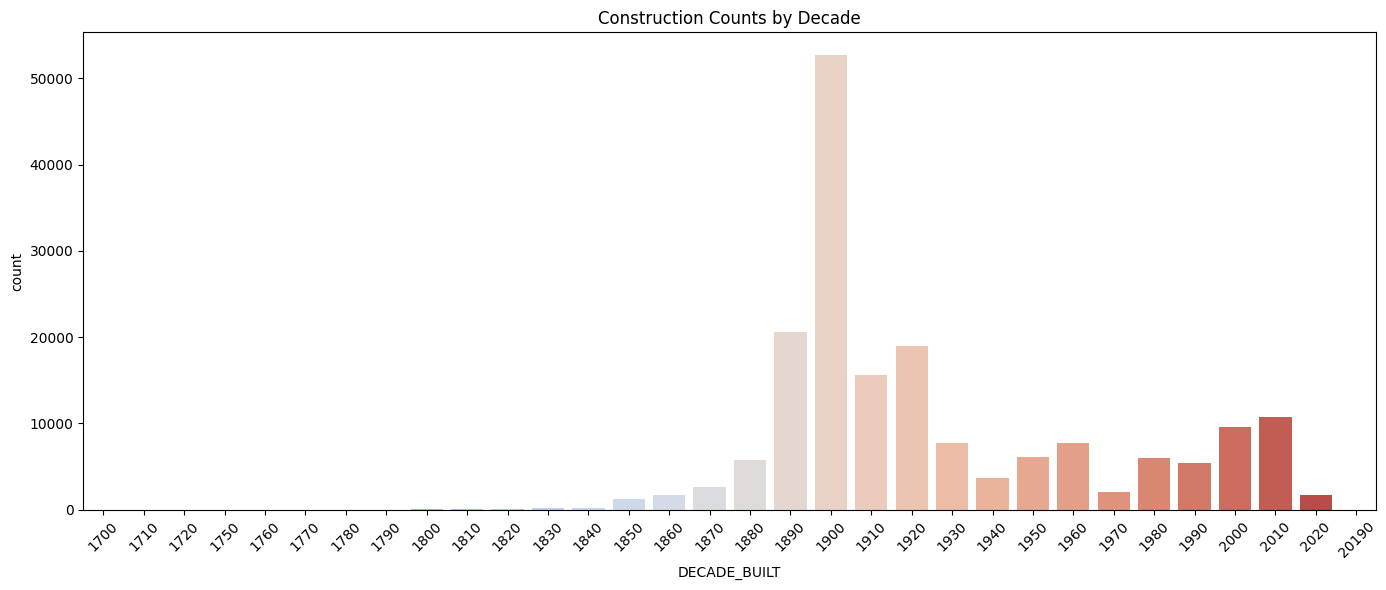

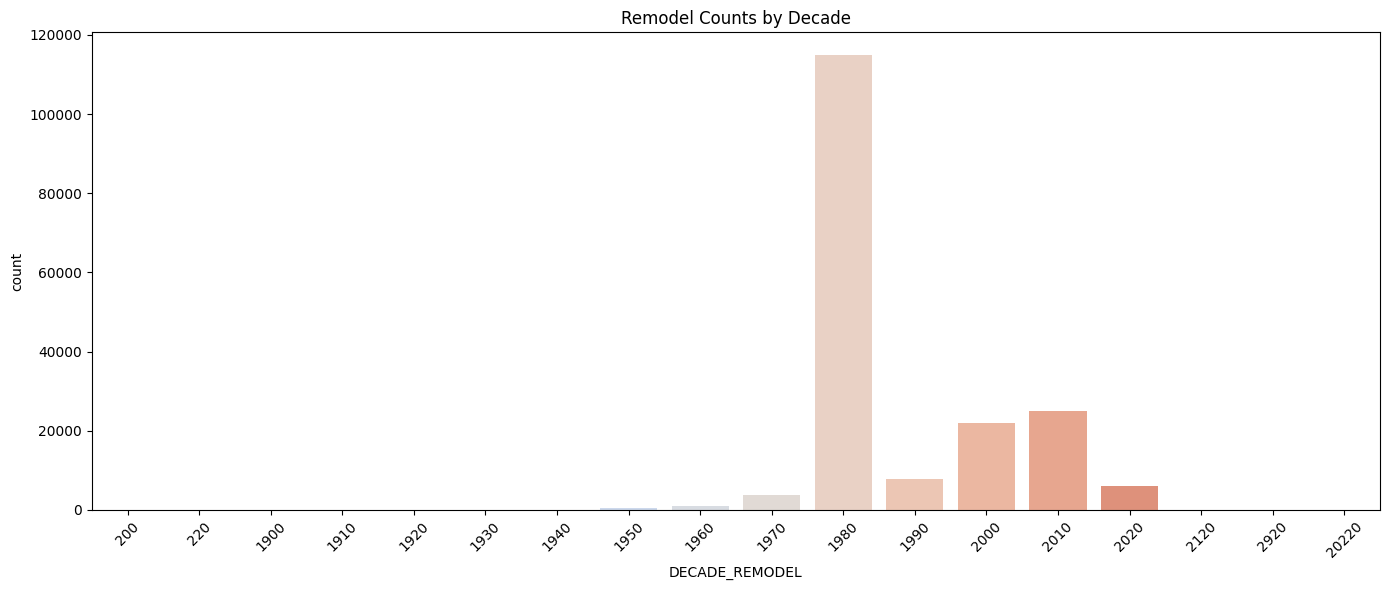


Correlation between YR_BUILT and TOTAL_VALUE: 0.019741912524324008
Correlation between YR_REMODEL and TOTAL_VALUE: 0.016732930445795137


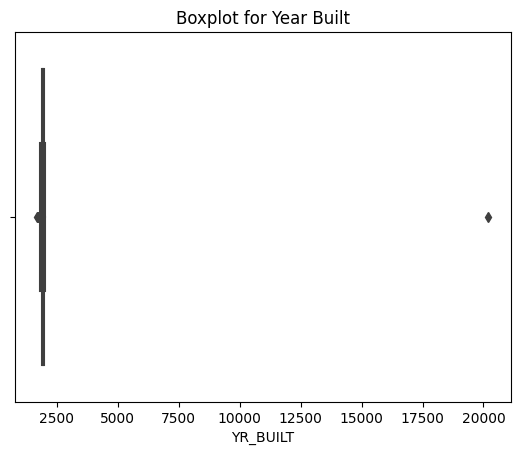

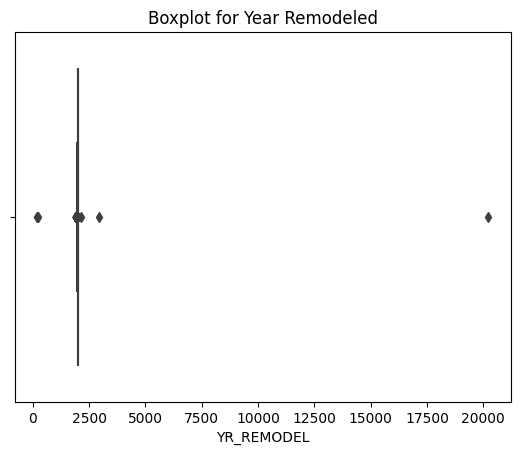

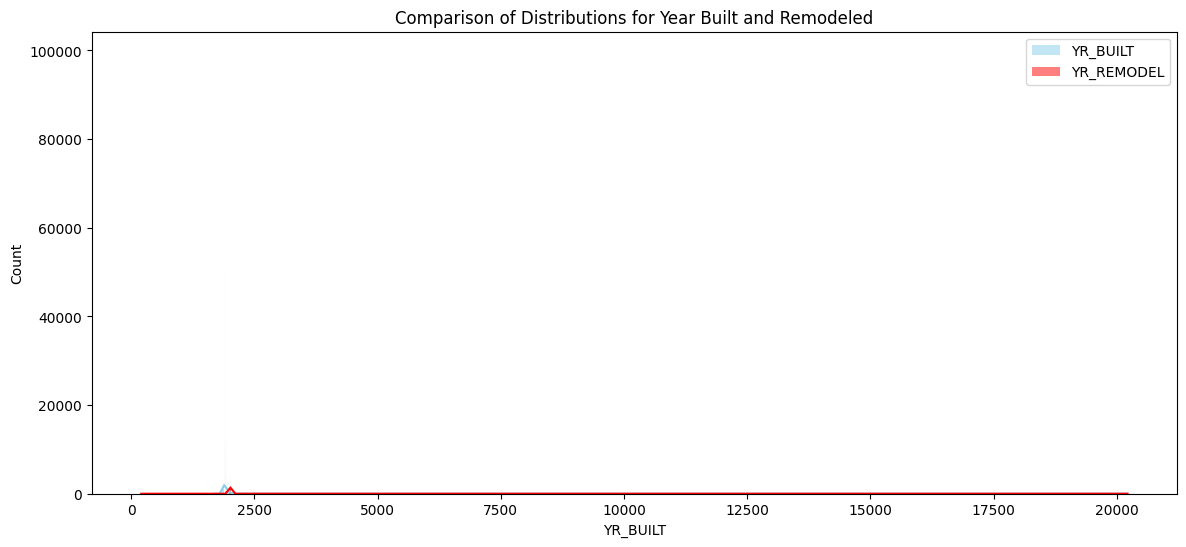


Renovation Rate: 100.00%


In [ ]:


# Descriptive Statistics
print("Descriptive Statistics for YR_BUILT:")
print(data['YR_BUILT'].describe())
print("\nDescriptive Statistics for YR_REMODEL:")
print(data['YR_REMODEL'].describe())

# Distribution Analysis
print("\nSkewness and Kurtosis for YR_BUILT:")
print(f"Skewness: {data['YR_BUILT'].skew()}")
print(f"Kurtosis: {data['YR_BUILT'].kurt()}")

print("\nSkewness and Kurtosis for YR_REMODEL:")
print(f"Skewness: {data['YR_REMODEL'].skew()}")
print(f"Kurtosis: {data['YR_REMODEL'].kurt()}")

# Decade or Period Analysis
data['DECADE_BUILT'] = (data['YR_BUILT'] // 10) * 10
data['DECADE_REMODEL'] = (data['YR_REMODEL'] // 10) * 10

decade_built_counts = data['DECADE_BUILT'].value_counts().sort_index()
decade_remodel_counts = data['DECADE_REMODEL'].value_counts().sort_index()

print("\nConstruction Counts by Decade:")
print(decade_built_counts)
print("\nRemodel Counts by Decade:")
print(decade_remodel_counts)

# Time Series Analysis
plt.figure(figsize=(14, 6))
sns.countplot(x='DECADE_BUILT', data=data, palette="coolwarm")
plt.title('Construction Counts by Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.countplot(x='DECADE_REMODEL', data=data, palette="coolwarm")
plt.title('Remodel Counts by Decade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation with Value
value_correlation_built = data['YR_BUILT'].corr(data['TOTAL_VALUE'])
value_correlation_remodel = data['YR_REMODEL'].corr(data['TOTAL_VALUE'])

print(f"\nCorrelation between YR_BUILT and TOTAL_VALUE: {value_correlation_built}")
print(f"Correlation between YR_REMODEL and TOTAL_VALUE: {value_correlation_remodel}")

# Outliers Detection
sns.boxplot(x=data['YR_BUILT'])
plt.title('Boxplot for Year Built')
plt.show()

sns.boxplot(x=data['YR_REMODEL'])
plt.title('Boxplot for Year Remodeled')
plt.show()

# Comparison of Distributions
plt.figure(figsize=(14, 6))
sns.histplot(data['YR_BUILT'], color="skyblue", label='YR_BUILT', kde=True)
sns.histplot(data['YR_REMODEL'], color="red", label='YR_REMODEL', kde=True)
plt.legend()
plt.title('Comparison of Distributions for Year Built and Remodeled')
plt.show()

# Renovation Rate
renovation_rate = data['YR_REMODEL'].notnull().sum() / len(data)
print(f"\nRenovation Rate: {renovation_rate:.2%}")


Based on the histograms, boxplots, and the provided descriptive statistics, we can derive a comprehensive understanding of the `YR_BUILT` and `YR_REMODEL` variables:

**YR_BUILT (Year Built) Analysis:**
- The majority of buildings were constructed in the early 20th century, with a significant peak around the 1900s.
- The distribution of construction years is right-skewed, as indicated by a skewness value greater than 1. This suggests that a greater number of buildings were constructed in later years compared to earlier ones.
- The kurtosis is less than 3 (which would be the kurtosis of a normal distribution), indicating that the distribution is somewhat flat-topped and has lighter tails.
- The boxplot for `YR_BUILT` shows a median around 1910, and there are some outliers on both ends of the distribution, with more noticeable outliers for buildings constructed very early (around the 1800s) and some recent ones post-2000.

**YR_REMODEL (Year Remodeled) Analysis:**
- A substantial number of remodels occurred in the decade of the 2010s, which is evident from both the histogram and the decade count data.
- The distribution of remodel years is left-skewed, as indicated by a negative skewness value, meaning that more properties were remodeled in the years closer to the present than in the past.
- The kurtosis value for `YR_REMODEL` is greater than 3, indicating a more peaked distribution compared to a normal distribution, with heavier tails.
- The boxplot for `YR_REMODEL` indicates that the median year of remodeling is quite recent (around 2019), with a tight interquartile range. There are outliers indicating some properties remodeled as early as the 1950s to 1980s, which are far from the bulk of remodeling activities.

**Correlation with Total Value:**
- Both `YR_BUILT` and `YR_REMODEL` have very low correlation coefficients with `TOTAL_VALUE`, suggesting that there isn't a strong linear relationship between the year built or remodeled and the total value of the properties.

**Renovation Rate:**
- The renovation rate is reported to be 100%, which seems to suggest that every building in the dataset has been remodeled. This could either indicate a dataset where only remodeled buildings were recorded, or it might be an artifact of the data collection process or a data entry issue.

**Overall Observations:**
- The data shows a historical trend in construction and remodeling activities. The peak in construction in the early 1900s might reflect historical growth periods or the availability of records from that time.
- The peak in remodeling in the 2010s could be due to recent redevelopment efforts, changes in building standards, or a push for modernization of properties.
- The lack of a strong correlation with `TOTAL_VALUE` may suggest that factors other than the age or the recency of remodeling are more influential on the property values in this dataset.

When interpreting this data, it's crucial to consider the context of the dataset, including geographic location, the nature of the housing stock, and local historical events that may affect construction and remodeling trends.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 60 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 180627 non-null  int64  
 1   CM_ID               91160 non-null   float64
 2   GIS_ID              180627 non-null  int64  
 3   ST_NUM              171096 non-null  float64
 4   ST_NAME             180627 non-null  object 
 5   UNIT_NUM            80672 non-null   object 
 6   CITY                180622 non-null  object 
 7   ZIP_CODE            180624 non-null  float64
 8   BLDG_SEQ            180626 non-null  float64
 9   NUM_BLDGS           180627 non-null  int64  
 10  LUC                 180627 non-null  int64  
 11  LU                  180627 non-null  object 
 12  LU_DESC             180627 non-null  object 
 13  BLDG_TYPE           178101 non-null  object 
 14  OWN_OCC             180627 non-null  object 
 15  OWNER               180627 non-nul

In [ ]:
columns_to_remove = ['PID', 'CM_ID', 'GIS_ID', 'ST_NUM', 'BLDG_SEQ','OWNER','OWNER MAIL ADDRESS']

# Remove the specified columns
data.drop(columns=columns_to_remove, inplace=True)


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180627 entries, 0 to 180626
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ST_NAME          180627 non-null  object 
 1   UNIT_NUM         80672 non-null   object 
 2   CITY             180622 non-null  object 
 3   ZIP_CODE         180624 non-null  float64
 4   NUM_BLDGS        180627 non-null  int64  
 5   LUC              180627 non-null  int64  
 6   LU               180627 non-null  object 
 7   LU_DESC          180627 non-null  object 
 8   BLDG_TYPE        178101 non-null  object 
 9   OWN_OCC          180627 non-null  object 
 10  RES_FLOOR        147122 non-null  float64
 11  CD_FLOOR         70556 non-null   float64
 12  RES_UNITS        10330 non-null   float64
 13  COM_UNITS        623 non-null     float64
 14  RC_UNITS         37 non-null      float64
 15  LAND_SF          173082 non-null  float64
 16  GROSS_AREA       145994 non-null  floa

This code snippet operates in two steps:

It selects numerical columns, calculates their median, and then fills missing values in these columns with their respective median.

It selects categorical columns and fills missing values with the string 'unknown'.

In [ ]:
data.describe()

,ZIP_CODE,NUM_BLDGS,LUC,RES_FLOOR,CD_FLOOR,RES_UNITS,COM_UNITS,RC_UNITS,LAND_SF,GROSS_AREA,...,GROSS_TAX,YR_BUILT,YR_REMODEL,BED_RMS,FULL_BTH,HLF_BTH,KITCHENS,TT_RMS,FIREPLACES,NUM_PARKING
count,180624.000000,180627.000000,180627.000000,147122.000000,70556.000000,10330.000000,623.000000,37.000000,1.730820e+05,1.459940e+05,...,1.806270e+05,180627.000000,180627.000000,132340.000000,169511.000000,169663.000000,169513.000000,132273.000000,169666.000000,132427.000000
mean,2129.834446,1.016974,202.578407,1.883077,3.506449,6.834947,3.030498,3.243243,7.815553e+03,5.388978e+03,...,1.693066e+04,1928.218450,1992.714090,3.156090,1.350756,0.220885,1.052592,6.967333,0.268038,1.337960
std,30.755499,0.464298,265.812738,1.120948,5.270741,18.377907,10.525304,6.125563,2.630641e+05,4.137759e+04,...,2.205953e+05,60.483627,45.497325,2.096802,1.051548,0.458817,0.809050,4.018342,0.621520,2.416274
min,2026.000000,1.000000,13.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000e+02,3.000000e+00,...,0.000000e+00,1700.000000,201.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,2119.000000,1.000000,102.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000e+03,9.740000e+02,...,3.883587e+03,1900.000000,1985.000000,2.000000,1.000000,0.000000,1.000000,4.000000,0.000000,0.000000
50%,2127.000000,1.000000,102.000000,2.000000,2.000000,3.000000,1.000000,1.000000,2.014000e+03,2.125000e+03,...,6.461187e+03,1910.000000,1985.000000,3.000000,1.000000,0.000000,1.000000,6.000000,0.000000,1.000000
75%,2131.000000,1.000000,108.000000,2.500000,4.000000,5.000000,2.000000,2.000000,4.770000e+03,4.042000e+03,...,9.712177e+03,1955.000000,2003.000000,4.000000,2.000000,0.000000,1.000000,9.000000,0.000000,2.000000
max,2467.000000,119.000000,995.000000,62.000000,60.000000,477.000000,212.000000,29.000000,1.015136e+08,6.982322e+06,...,2.393570e+07,20198.000000,20220.000000,17.000000,17.000000,7.000000,5.000000,20.000000,12.000000,210.000000


In [ ]:

# Calculate the correlation matrix for the entire DataFrame
correlation_matrix = data.corr()

# For LAND_VALUE
land_value_correlations = correlation_matrix['LAND_VALUE'].drop(labels=['LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE','GROSS_TAX']).sort_values(ascending=False)

# For BLDG_VALUE
bldg_value_correlations = correlation_matrix['BLDG_VALUE'].drop(labels=['LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE','GROSS_TAX']).sort_values(ascending=False)

# For TOTAL_VALUE
total_value_correlations = correlation_matrix['TOTAL_VALUE'].drop(labels=['LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE','GROSS_TAX']).sort_values(ascending=False)

# Display the most correlated fields with each of the three variables
print("Most correlated fields with LAND_VALUE:")
print(land_value_correlations)

print("\nMost correlated fields with BLDG_VALUE:")
print(bldg_value_correlations)

print("\nMost correlated fields with TOTAL_VALUE:")
print(total_value_correlations)

<ipython-input-18-c56d8620d841>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Most correlated fields with LAND_VALUE:
LIVING_AREA    0.750806
GROSS_AREA     0.748739
LAND_SF        0.412384
NUM_BLDGS      0.279896
LUC            0.090779
RES_FLOOR      0.031139
BED_RMS        0.015764
TT_RMS         0.009917
YR_REMODEL     0.009051
YR_BUILT       0.007471
ZIP_CODE       0.004406
NUM_PARKING    0.002390
RC_UNITS      -0.000424
COM_UNITS     -0.000948
RES_UNITS     -0.004165
FIREPLACES    -0.010562
CD_FLOOR      -0.014847
HLF_BTH       -0.016552
FULL_BTH      -0.061664
KITCHENS      -0.065701
Name: LAND_VALUE, dtype: float64

Most correlated fields with BLDG_VALUE:
GROSS_AREA     0.710033
LIVING_AREA    0.703222
NUM_BLDGS      0.173296
LAND_SF        0.058124
LUC            0.044861
RES_FLOOR      0.023853
YR_BUILT       0.021326
CD_FLOOR       0.014971
YR_REMODEL     0.009892
BED_RMS        0.000813
NUM_PARKING    0.000612
ZIP_CODE       0.000558
FIREPLACES     0.000491
RC_UNITS      -0.000517
COM_UNITS     -0.001155
TT_RMS        -0.003959
HLF_BTH       -0.00468

The correlation analysis of your dataset reveals key relationships between property values and their features:

**Area and Value Relationship**: `LIVING_AREA` and `GROSS_AREA` exhibit the strongest positive correlations with `LAND_VALUE`, `BLDG_VALUE`, and `TOTAL_VALUE`. This indicates that larger properties tend to have higher values across these categories. The size of the property, both in terms of living space and total area, appears to be a significant indicator of value.

**Land Size**: `LAND_SF`, or land square footage, shows a moderate positive correlation with `LAND_VALUE`, and a lower yet significant correlation with `BLDG_VALUE` and `TOTAL_VALUE`. More land typically means a higher value, but the impact is not as strong as the built area of the property.

**Number of Buildings**: `NUM_BLDGS` has a low positive correlation with all three value measures, suggesting that properties with multiple buildings may have higher values, although this effect is not as pronounced as the area-related variables.

**Minor Influences**: Other variables such as `LUC`, `RES_FLOOR`, and `YR_BUILT` have much weaker correlations with property values, indicating these factors have a less direct impact on value compared to area and land size.

**Negative Correlations**: `KITCHENS`, `FULL_BTH`, and `HLF_BTH` show negative correlations with property values, albeit weakly, which could be an area for further investigation to understand the underlying reasons.

In summary, the size of a property, in terms of its living and total area, along with the amount of land, are the most significant predictors of its value. The number of buildings on the property also contributes to value, but to a lesser extent. Other features have minimal impact, and there are some unexpected negative correlations that may require additional contextual analysis to interpret.

In [ ]:
data_clean=pd.DataFrame()
data_clean = data[~((data['YR_BUILT'] > 2023) | (data['YR_REMODEL'] > 2023))]


In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 180623 entries, 0 to 180626
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ST_NAME          180623 non-null  object 
 1   UNIT_NUM         180623 non-null  object 
 2   CITY             180623 non-null  object 
 3   ZIP_CODE         180623 non-null  float64
 4   NUM_BLDGS        180623 non-null  int64  
 5   LUC              180623 non-null  int64  
 6   LU               180623 non-null  object 
 7   LU_DESC          180623 non-null  object 
 8   BLDG_TYPE        180623 non-null  object 
 9   OWN_OCC          180623 non-null  object 
 10  RES_FLOOR        180623 non-null  float64
 11  CD_FLOOR         180623 non-null  float64
 12  RES_UNITS        180623 non-null  float64
 13  COM_UNITS        180623 non-null  float64
 14  RC_UNITS         180623 non-null  float64
 15  LAND_SF          180623 non-null  float64
 16  GROSS_AREA       180623 non-null  floa

In [ ]:
numerical_cols = data_clean.select_dtypes(include=['float64','int64']).columns
data_clean[numerical_cols] = data_clean[numerical_cols].fillna(data_clean[numerical_cols].median())

# Update missing categorical values with 'unknown'
categorical_cols = data_clean.select_dtypes(include=['object']).columns
data_clean[categorical_cols] = data_clean[categorical_cols].fillna('unknown')


<ipython-input-23-2ab1a6cd5f89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[numerical_cols] = data_clean[numerical_cols].fillna(data_clean[numerical_cols].median())
<ipython-input-23-2ab1a6cd5f89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clean[categorical_cols] = data_clean[categorical_cols].fillna('unknown')


In [ ]:
data_clean['RES_UNITS'].describe()

count    180623.000000
mean          3.219324
std           4.484120
min           1.000000
25%           3.000000
50%           3.000000
75%           3.000000
max         477.000000
Name: RES_UNITS, dtype: float64

In [ ]:
# Calculate descriptive statistics for numerical columns
numerical_columns = ['LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE', 'LIVING_AREA', 'GROSS_AREA', 'YR_BUILT']
numerical_descriptive_stats = data_clean[numerical_columns].describe()
print(numerical_descriptive_stats)


         LAND_VALUE    BLDG_VALUE   TOTAL_VALUE   LIVING_AREA    GROSS_AREA  \
count  1.806230e+05  1.806230e+05  1.806230e+05  1.806230e+05  1.806230e+05   
mean   3.765859e+05  1.120689e+06  1.500262e+06  3.814134e+03  4.763210e+03   
std    4.422217e+06  1.080367e+07  1.411631e+07  3.457179e+04  3.722244e+04   
min    0.000000e+00  0.000000e+00  0.000000e+00  2.000000e+00  3.000000e+00   
25%    0.000000e+00  2.987000e+05  3.796000e+05  1.058000e+03  1.112000e+03   
50%    0.000000e+00  4.892000e+05  6.096000e+05  1.494000e+03  2.125000e+03   
75%    2.250000e+05  7.449000e+05  9.141000e+05  2.271000e+03  3.479000e+03   
max    4.860469e+08  1.723256e+09  2.143053e+09  6.982322e+06  6.982322e+06   

            YR_BUILT  
count  180623.000000  
mean     1928.117826  
std        42.548188  
min      1700.000000  
25%      1900.000000  
50%      1910.000000  
75%      1955.000000  
max      2022.000000  


The descriptive statistics of your dataset reveal significant insights into the properties it encompasses. With 180,623 entries, the dataset shows consistent reporting across all examined columns. The average values for land, building, and total property are approximately $376,586, $1,120,689, and $1,500,262 respectively, indicating a wide range in property values, as further evidenced by high standard deviations. The average living and gross areas are 3,814 and 4,763 square feet, respectively, with the year of construction predominantly centered around 1928.

The value distribution is notably skewed, with median values for land, building, and total property significantly lower than their respective means. This skewness suggests a concentration of higher-value properties within a subset of the dataset. The property sizes also exhibit similar skewness, with the median living and gross areas noticeably smaller than the average, indicating a prevalence of smaller-sized properties in the dataset.

Historical depth is apparent, with the earliest property dating back to 1700 and a significant portion built before 1910, as indicated by the median year built. The 75th percentile for year built is 1955, showing that a quarter of the properties are relatively more recent. The maximum values in various categories point towards the presence of exceptionally high-value and large properties, highlighting the dataset's diversity from historical to modern properties.

In [ ]:
data_clean[data_clean['TOTAL_VALUE']==0][['LAND_VALUE', 'BLDG_VALUE', 'TOTAL_VALUE']]

,LAND_VALUE,BLDG_VALUE,TOTAL_VALUE
17,0,0,0
22,0,0,0
30,0,0,0
118,0,0,0
153,0,0,0
...,...,...,...
180137,0,0,0
180530,0,0,0
180571,0,0,0
180586,0,0,0


In [ ]:
data_clean = data_clean.drop_duplicates()


In [ ]:
data_clean = data_clean[~(data_clean['TOTAL_VALUE']==0)]

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169362 entries, 0 to 180626
Data columns (total 53 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   ST_NAME          169362 non-null  object 
 1   UNIT_NUM         169362 non-null  object 
 2   CITY             169362 non-null  object 
 3   ZIP_CODE         169362 non-null  float64
 4   NUM_BLDGS        169362 non-null  int64  
 5   LUC              169362 non-null  int64  
 6   LU               169362 non-null  object 
 7   LU_DESC          169362 non-null  object 
 8   BLDG_TYPE        169362 non-null  object 
 9   OWN_OCC          169362 non-null  object 
 10  RES_FLOOR        169362 non-null  float64
 11  CD_FLOOR         169362 non-null  float64
 12  RES_UNITS        169362 non-null  float64
 13  COM_UNITS        169362 non-null  float64
 14  RC_UNITS         169362 non-null  float64
 15  LAND_SF          169362 non-null  float64
 16  GROSS_AREA       169362 non-null  floa

In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming data is your DataFrame
numerical_columns =data_clean.select_dtypes(include=['float64','int64']).columns
standard_scaler = StandardScaler()

# Standardizing the numerical columns
data_standardized = standard_scaler.fit_transform(data_clean[numerical_columns])
data_standardized = pd.DataFrame(data_standardized, columns=numerical_columns)


In [ ]:
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Load your data
# data = pd.read_csv('your_dataset.csv')
# Assuming data is already loaded
# Let's say 'Categorical_Column_1' and 'Categorical_Column_2' are your categorical columns
categorical_columns=['CITY', 'LU', 'OWN_OCC',
       'STRUCTURE_CLASS', 'ROOF_STRUCTURE',
       'ROOF_COVER', 'INT_WALL', 'EXT_FNISHED', 'INT_COND', 'EXT_COND',
       'OVERALL_COND', 'BDRM_COND', 'BTHRM_STYLE1', 'BTHRM_STYLE2',
       'BTHRM_STYLE3', 'KITCHEN_TYPE', 'KITCHEN_STYLE1', 'KITCHEN_STYLE2',
       'KITCHEN_STYLE3', 'HEAT_TYPE', 'HEAT_FUEL', 'AC_TYPE', 'ORIENTATION',
       'PROP_VIEW', 'CORNER_UNIT']
numerical_columns =['NUM_BLDGS',
       'LUC', 'RES_FLOOR', 'CD_FLOOR', 'RES_UNITS', 'COM_UNITS', 'RC_UNITS',
       'LAND_SF', 'GROSS_AREA', 'LIVING_AREA','YR_BUILT', 'YR_REMODEL', 'BED_RMS',
       'FULL_BTH', 'HLF_BTH', 'KITCHENS', 'TT_RMS', 'FIREPLACES',
       'NUM_PARKING']

# Assuming data is your DataFrame and 'Category_Column' is your column of interest
top_10_values = data_clean['BLDG_TYPE'].value_counts().head(10).index

# Replace other values with 'misc'
data_clean['BLDG_TYPE'] = data_clean['BLDG_TYPE'].apply(lambda x: x if x in top_10_values else 'Misc')

# One-hot encode the modified column
encoded_data = pd.get_dummies(data_clean['BLDG_TYPE'], prefix='Category')

# Concatenate the encoded data with the original DataFrame
# (You may choose to drop the original 'Category_Column' if it's no longer needed)
#data = pd.concat([data_clean, encoded_data], axis=1)
# One-hot encode the categorical data
encoded_categorical = pd.get_dummies(data_clean[categorical_columns])

# Resetting indices of the DataFrames to ensure alignment
data_standardized.reset_index(drop=True, inplace=True)
encoded_categorical.reset_index(drop=True, inplace=True)
encoded_data.reset_index(drop=True, inplace=True)

# Verifying the number of rows in each DataFrame
print("Number of rows in data_standardized:", data_standardized.shape[0])
print("Number of rows in encoded_categorical:", encoded_categorical.shape[0])
print("Number of rows in encoded_data:", encoded_data.shape[0])

# Combine with numerical data
X = pd.concat([data_standardized, encoded_categorical,encoded_data], axis=1)
X.drop(columns=['TOTAL_VALUE'], inplace=True)
y = data_standardized['TOTAL_VALUE']


# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model for RFE
model = LinearRegression()

# Create the RFE model and select attributes
rfe = RFE(model, n_features_to_select=10)
rfe = rfe.fit(X_train, y_train)

# summarize the selection of the attributes
print('Selected features:', X_train.columns[rfe.support_])

# Fit the model with selected features
model.fit(X_train[X_train.columns[rfe.support_]], y_train)

# Make predictions and evaluate
y_pred = model.predict(X_test[X_test.columns[rfe.support_]])
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Number of rows in data_standardized: 169362
Number of rows in encoded_categorical: 169362
Number of rows in encoded_data: 169362
Selected features: Index(['BDRM_COND_A - Average', 'BDRM_COND_E - Excellent',
       'BDRM_COND_G - Good', 'BDRM_COND_P - Poor', 'BDRM_COND_unknown',
       'KITCHEN_STYLE1_L - Luxury', 'KITCHEN_STYLE1_M - Modern',
       'KITCHEN_STYLE1_N - No Remodeling', 'KITCHEN_STYLE1_S - Semi-Modern',
       'KITCHEN_STYLE1_unknown'],
      dtype='object')
Mean Squared Error: 0.8441828573256113
R-squared: 0.011001928813263673


In [ ]:
categorical_columns = ['BDRM_COND_A - Average', 'BDRM_COND_E - Excellent',
       'BDRM_COND_G - Good', 'BDRM_COND_P - Poor',
       'KITCHEN_STYLE1_L - Luxury', 'KITCHEN_STYLE1_M - Modern',
       'KITCHEN_STYLE1_N - No Remodeling', 'KITCHEN_STYLE1_S - Semi-Modern']

# Concatenate standardized numerical columns with categorical columns
final_data = pd.concat([data_standardized, encoded_categorical[categorical_columns]], axis=1)

NameError: ignored

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target variable
target = 'TOTAL_VALUE'

# Splitting the data into training and testing sets
X = final_data
y = data_clean[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Displaying the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


ValueError: ignored

In [ ]:
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 170075 entries, 0 to 180626
Data columns (total 62 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   PID                 170075 non-null  int64  
 1   CM_ID               170075 non-null  float64
 2   GIS_ID              170075 non-null  int64  
 3   ST_NUM              170075 non-null  float64
 4   ST_NAME             170075 non-null  object 
 5   UNIT_NUM            170075 non-null  object 
 6   CITY                170075 non-null  object 
 7   ZIP_CODE            170075 non-null  float64
 8   BLDG_SEQ            170075 non-null  float64
 9   NUM_BLDGS           170075 non-null  int64  
 10  LUC                 170075 non-null  int64  
 11  LU                  170075 non-null  object 
 12  LU_DESC             170075 non-null  object 
 13  BLDG_TYPE           170075 non-null  object 
 14  OWN_OCC             170075 non-null  object 
 15  OWNER               170075 non-nul